This work is done in the context of Machine Learning Course at TBS.

In [1]:
import numpy as np 
import pandas as pd

import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline

from scipy import stats
from IPython.display import display
from scipy.stats import ks_2samp, chi2_contingency
from IPython.display import display
from scipy.stats import ks_2samp, chi2_contingency
from IPython.display import display
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

import keras_tuner as kt





First Look:

In [2]:
df = pd.read_csv(r'C:\Users\Dorra\Pictures\ML\mushroom_cleaned.csv')
df.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


Nb of entries in our dataset:

In [3]:
df.shape

(54035, 9)

Columns and types:

In [4]:
df.dtypes


cap-diameter         int64
cap-shape            int64
gill-attachment      int64
gill-color           int64
stem-height        float64
stem-width           int64
stem-color           int64
season             float64
class                int64
dtype: object

The dataset provided is already cleaned, but we will check nonetheless:

In [5]:
df.isnull().sum()


cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
class              0
dtype: int64

Descriptive Statistics:

In [6]:
df.describe().iloc[1:]


,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
mean,567.257204,4.000315,2.142056,7.329509,0.759110,1051.081299,8.418062,0.952163,0.549181
std,359.883763,2.160505,2.228821,3.200266,0.650969,782.056076,3.262078,0.305594,0.497580
min,0.000000,0.000000,0.000000,0.000000,0.000426,0.000000,0.000000,0.027372,0.000000
25%,289.000000,2.000000,0.000000,5.000000,0.270997,421.000000,6.000000,0.888450,0.000000
50%,525.000000,5.000000,1.000000,8.000000,0.593295,923.000000,11.000000,0.943195,1.000000
75%,781.000000,6.000000,4.000000,10.000000,1.054858,1523.000000,11.000000,0.943195,1.000000
max,1891.000000,6.000000,6.000000,11.000000,3.835320,3569.000000,12.000000,1.804273,1.000000


Correlation between Class and the rest of the columns:

In [7]:
df_corr = df.corr()['class'][:-1] # -1 to remove the last row which is class
df_corr.sort_values()

stem-width        -0.182856
cap-diameter      -0.165676
cap-shape         -0.133338
stem-color        -0.128339
season            -0.082919
gill-color        -0.063947
gill-attachment   -0.052541
stem-height        0.183354
Name: class, dtype: float64

Observations from Data Exploration:
- Dataset has 54035 rows and 9 columns.
- Data type of all columns is numerical (float or integer).
- All values are non-null. Therefore no missing values.
- Correlation between class and feature columns in df is low, absolute value ranging between 5% and 18.3%.

The dataset has already undergone z-score normalization, so we will skip that step.

Outliers:

In [8]:
# Calculate the z-scores for each column
z_scores = pd.DataFrame(stats.zscore(df), columns=df.columns)

# Generate descriptive statistics for the z-scores
z_scores.describe().round(3)

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
count,54035.000,54035.000,54035.000,54035.000,54035.000,54035.000,54035.000,54035.000,54035.000
mean,0.000,0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-1.576,-1.852,-0.961,-2.290,-1.165,-1.344,-2.581,-3.026,-1.104
25%,-0.773,-0.926,-0.961,-0.728,-0.750,-0.806,-0.741,-0.208,-1.104
50%,-0.117,0.463,-0.512,0.210,-0.255,-0.164,0.792,-0.029,0.906
75%,0.594,0.926,0.834,0.834,0.454,0.603,0.792,-0.029,0.906
max,3.678,0.926,1.731,1.147,4.726,3.220,1.098,2.788,0.906


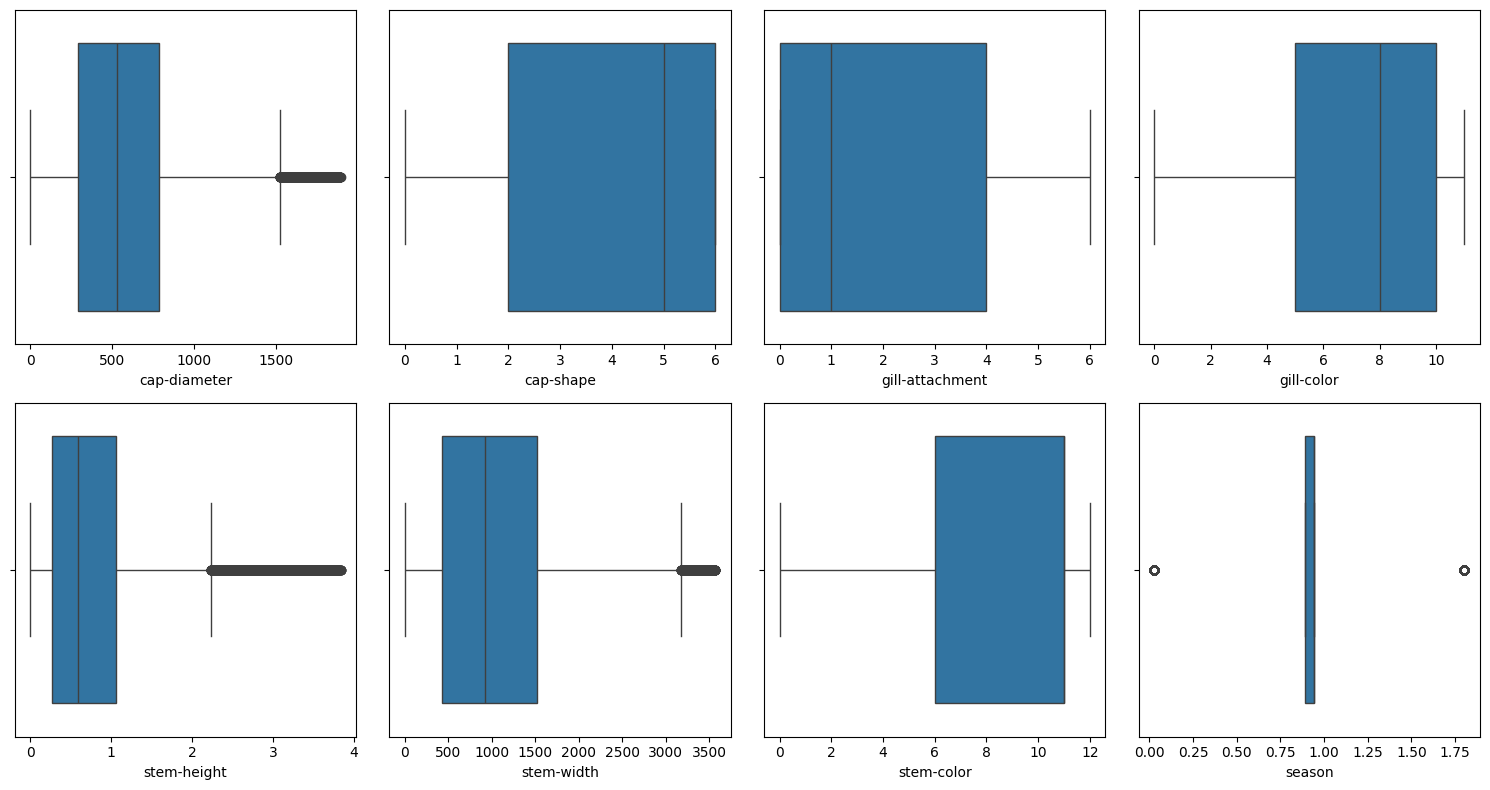

In [9]:
columns = ['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color','stem-height', 'stem-width', 'stem-color', 'season']

fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))
axs = axs.flatten()
for i, column in enumerate(columns):
    sns.boxplot(data=df, x=column, ax=axs[i])  

plt.tight_layout()  
plt.show() 

In [10]:
# Identify rows where any of the z-scores exceed the threshold
outliers = z_scores[(np.abs(z_scores) > 3).any(axis=1)]

# Drop the identified rows containing outliers
df_no_outliers = df.drop(outliers.index)

Let's drop rows containing outliers (with Z-score > 3).

In [11]:
# Calculate number of rows of original dataframe, of new one and how many rows were removed
new_num_r = df_no_outliers.shape[0]
old_num_r = df.shape[0]
removed = old_num_r - new_num_r

print("New dataframe has {} rows. {} rows were removed.".format(new_num_r, removed))

New dataframe has 50397 rows. 3638 rows were removed.


Overall Class Imbalance:

Overall Class Distribution:
       proportion
class            
1       54.918109
0       45.081891


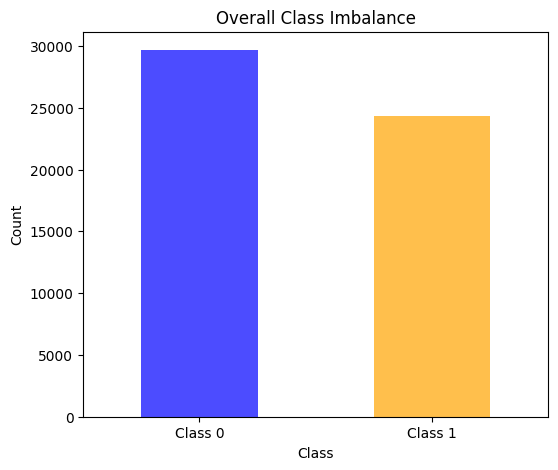

In [12]:
# Calculate overall class distribution
class_counts = df['class'].value_counts(normalize=True) * 100

# Display the class distribution
print("Overall Class Distribution:")
print(class_counts.to_frame())

# Visualizing Overall Class Imbalance with Blue and Orange Colors
plt.figure(figsize=(6, 5))
df['class'].value_counts().plot(kind='bar', color=['blue', 'orange'], alpha=0.7)
plt.title("Overall Class Imbalance")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=['Class 0', 'Class 1'], rotation=0)
plt.show()


Classes are overall reasonably balanced.

Features Class Imbalance:

In [13]:


# Define feature columns (excluding the target column 'class')
feature_columns = df.columns[df.columns != 'class']

# Re-run statistical tests for feature-class imbalance

# Dictionary to store test results
feature_class_imbalance_results = {}

# Iterate through each feature and perform statistical tests
for feature in feature_columns:
    # If the feature is numerical, use KS-Test
    if df[feature].dtype in ['int64', 'float64']:
        stat, p_value = ks_2samp(df[df['class'] == 1][feature], df[df['class'] == 0][feature])
        feature_class_imbalance_results[feature] = {'Test': 'KS-Test', 'Statistic': stat, 'P-Value': p_value}
    
    # If the feature is categorical, use Chi-Square Test
    else:
        contingency_table = pd.crosstab(df[feature], df['class'])
        chi2, p_value, _, _ = chi2_contingency(contingency_table)
        feature_class_imbalance_results[feature] = {'Test': 'Chi-Square', 'Statistic': chi2, 'P-Value': p_value}

# Convert results to DataFrame for easier interpretation
feature_class_imbalance_df = pd.DataFrame.from_dict(feature_class_imbalance_results, orient='index')

# Display the statistical results
display(feature_class_imbalance_df)



# Function to calculate Cohen's d (effect size)
def cohen_d(x1, x2):
    """Calculate Cohen's d for two independent samples."""
    mean_diff = np.mean(x1) - np.mean(x2)
    pooled_std = np.sqrt((np.std(x1, ddof=1) ** 2 + np.std(x2, ddof=1) ** 2) / 2)
    return mean_diff / pooled_std

# Dictionary to store effect size results
effect_size_results = {}

# Calculate Cohen's d for each numerical feature
for feature in feature_class_imbalance_df.index:
    class_1_values = df[df['class'] == 1][feature]
    class_0_values = df[df['class'] == 0][feature]
    
    # Compute Cohen's d
    effect_size = cohen_d(class_1_values, class_0_values)
    effect_size_results[feature] = {'Cohen\'s d': effect_size}

# Convert results to DataFrame
effect_size_df = pd.DataFrame.from_dict(effect_size_results, orient='index')

# Display effect size results
display(effect_size_df)



,Test,Statistic,P-Value
cap-diameter,KS-Test,0.174199,0.000000e+00
cap-shape,KS-Test,0.125214,2.769306e-183
gill-attachment,KS-Test,0.098374,3.799099e-113
gill-color,KS-Test,0.106554,1.015611e-132
stem-height,KS-Test,0.184579,0.000000e+00
stem-width,KS-Test,0.240441,0.000000e+00
stem-color,KS-Test,0.165519,8.754843e-321
season,KS-Test,0.074226,1.521302e-64


,Cohen's d
cap-diameter,-0.337909
cap-shape,-0.271657
gill-attachment,-0.105941
gill-color,-0.128616
stem-height,0.377580
stem-width,-0.375564
stem-color,-0.261044
season,-0.164263


All features have a Cohen’s d below 0.35 (maximum one being 0.34 with cap-diameter), meaning the differences aren’t very strong. Minimal imbalance, likely not a concern.

Even though statistical tests flagged all features as imbalanced, the effect size suggests the imbalance is weak, meaning negligible impact on the models.

Skewness:

In [14]:

# Calculate skewness for each numerical feature
skewness_results = df[feature_class_imbalance_df.index].skew()

# Convert to DataFrame for better visualization
skewness_df = skewness_results.to_frame(name="Skewness")

# Display skewness results
display(skewness_df)


,Skewness
cap-diameter,0.782562
cap-shape,-0.534834
gill-attachment,0.589288
gill-color,-0.488642
stem-height,1.461606
stem-width,0.812370
stem-color,-0.632628
season,0.551232


Understanding Skewness:
Skewness ≈ 0 → Symmetrical distribution (ideal for many models).
Skewness > 0.5 → Right (Positive) Skew (long tail on the right).
Skewness < -0.5 → Left (Negative) Skew (long tail on the left).
Severely skewed features (>1 or <-1) may need log transformation, square root transformation, or normalization.

"Stem-height" (1.46) and "Cap-diameter" (0.78) are moderately to highly right-skewed. 
"Cap-shape" (-0.53) and "Gill-color" (-0.48) are slightly left-skewed, but not extreme. 
"Gill-attachment" (0.59) is mildly right-skewed.

Data Visualizations:

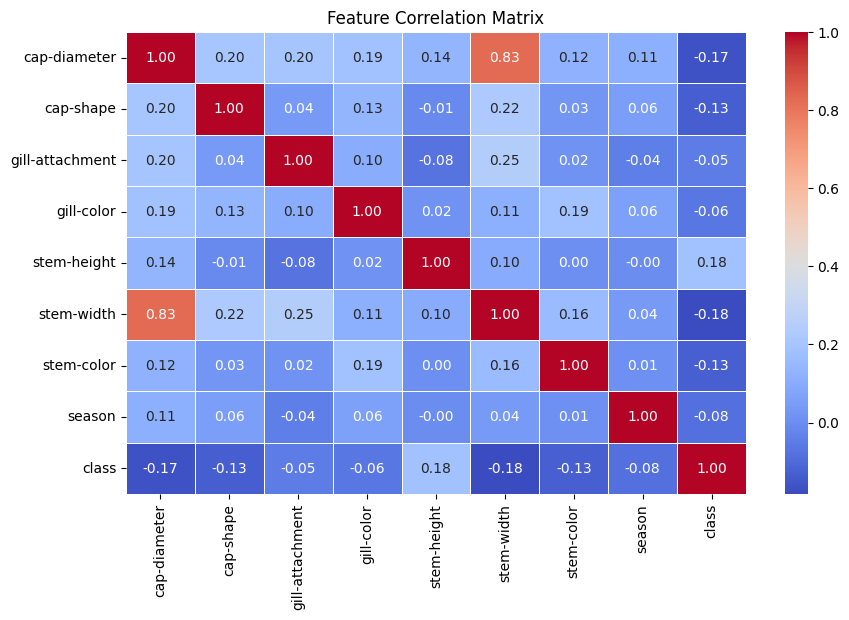

In [15]:

# Compute the correlation matrix
corr_matrix = df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()


Close to 1 → Strong positive correlation (both features increase together).
Close to -1 → Strong negative correlation (one increases while the other decreases).
Near 0 → Weak or no correlation.

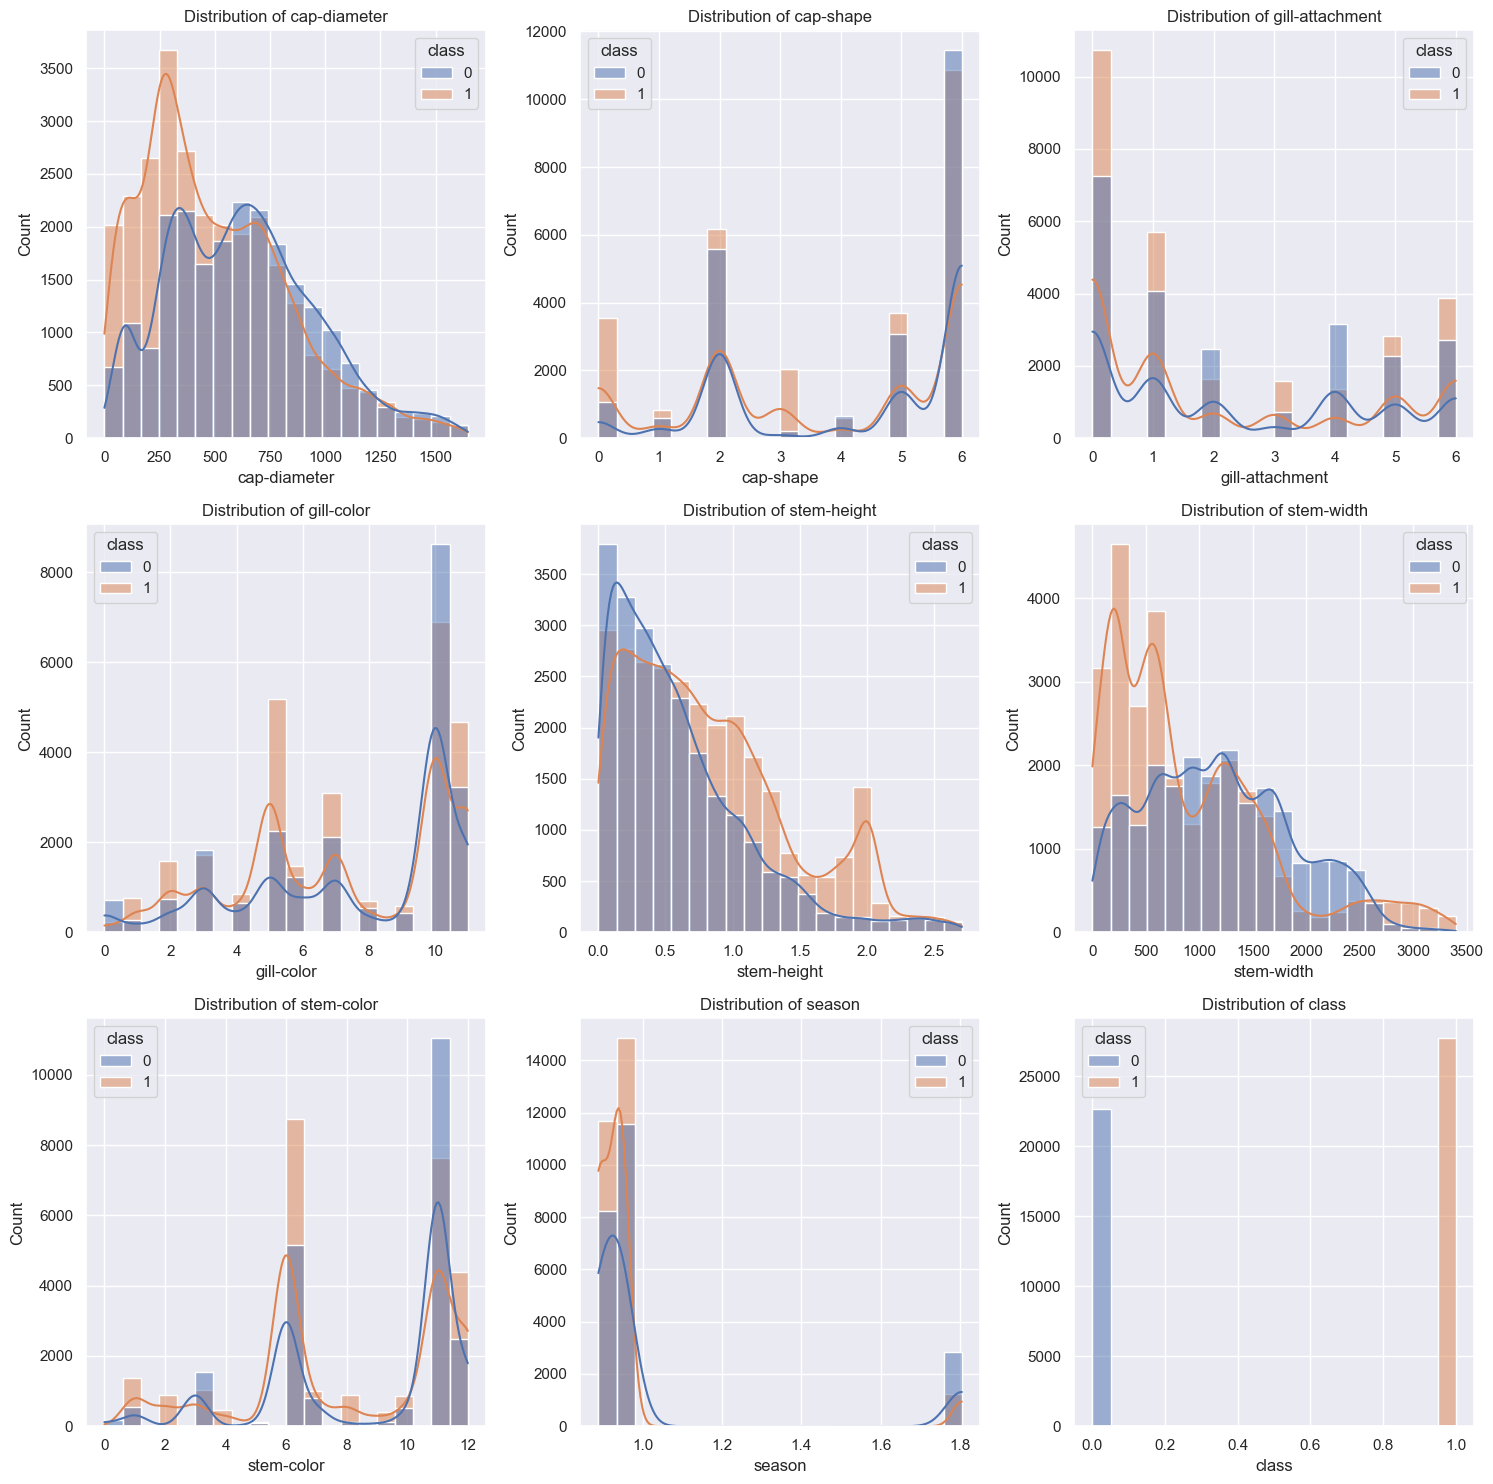

In [16]:
# Set Seaborn style
sns.set_theme()

# Create subplots with 3 columns and 3 rows
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over each column in the DataFrame
for i, column in enumerate(df_no_outliers.columns):
    # Create a histogram plot for the current column with hue
    sns.histplot(data=df_no_outliers, x=column, hue='class', kde=True, bins=20, ax=axes[i])
    
    # Set title for the plot
    axes[i].set_title(f'Distribution of {column}')
    
# Adjust layout to prevent overlap of titles
plt.tight_layout()

# Display the plot
plt.show()


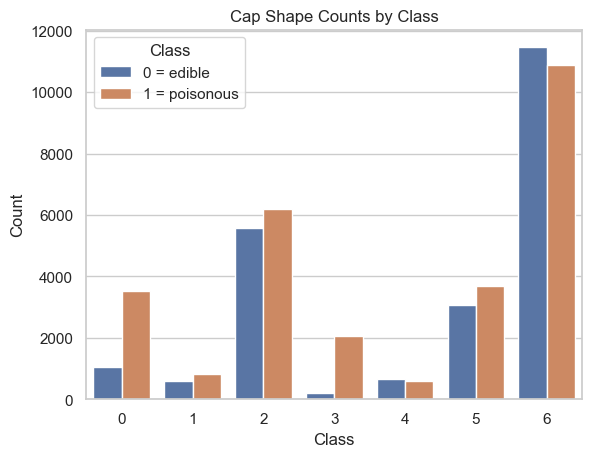

In [17]:
sns.set_theme(style="whitegrid")

# Create a count plot to visualize the distribution of 'cap-shape' with hue by 'class'
sns.countplot(hue='class', x='cap-shape', data=df_no_outliers)

# Adding title and labels
plt.title('Cap Shape Counts by Class')
plt.legend(title='Class', labels=['0 = edible', '1 = poisonous'])
plt.xlabel('Class')
plt.ylabel('Count')

plt.show()

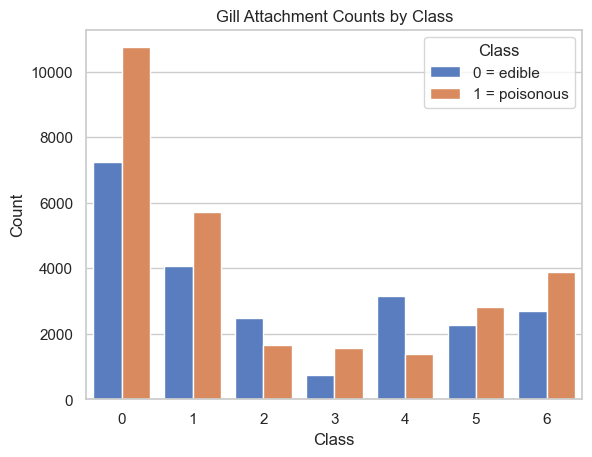

In [18]:
sns.set_theme(style="whitegrid", palette="muted", color_codes=True)

# Create a count plot to visualize the distribution of 'gill-attachment' with hue by 'class'
sns.countplot(hue='class', x='gill-attachment', data=df_no_outliers)

# Adding title and labels
plt.title('Gill Attachment Counts by Class')
plt.legend(title='Class', labels=['0 = edible', '1 = poisonous'])
plt.xlabel('Class')
plt.ylabel('Count')

plt.show()

Differences between classes are evident in the histograms and count plots. On average poisonous mushrooms have smaller cap diameters and taller, slimmer stems compared to edible ones.

Data Preprocessing:

Set a variable X equal to the numerical features and a variable y equal to the "class" column.

In [19]:
X = df_no_outliers.loc[:, df_no_outliers.columns != "class"]
y = df_no_outliers['class']

Data Scaling:

In [20]:

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

Train / Test Split: We must ensure all models use the same test and train sets so that we guarantee a fair comparison later on.

In [21]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=101, stratify=y)

Defining a cross validation k fold:

In [22]:

from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)


Traditional Models:

Logistic Regression:

In [23]:


logistic_model = LogisticRegression(max_iter=1000, random_state=42)

precision_list, recall_list, f1_list, support_list = [], [], [], []

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    logistic_model.fit(X_train, y_train)
    y_pred = logistic_model.predict(X_test)

    precision, recall, f1, support = precision_recall_fscore_support(
        y_test, y_pred, labels=[0, 1], zero_division=0
    )
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    support_list.append(support)

avg_precision = np.mean(precision_list, axis=0)
avg_recall = np.mean(recall_list, axis=0)
avg_f1 = np.mean(f1_list, axis=0)
avg_support = np.sum(support_list, axis=0) / kf.get_n_splits()

report = (
    f"Logistic Regression  (K={kf.get_n_splits()})\n\n"
    f"{'Class':<12}{'Precision':<12}{'Recall':<12}{'F1-Score':<12}{'Support':<12}\n"
)
for i, label in enumerate(["0", "1"]):
    report += (
        f"{label:<12}{avg_precision[i]:<12.2f}{avg_recall[i]:<12.2f}{avg_f1[i]:<12.2f}{avg_support[i]:<12.0f}\n"
    )
report += (
    f"\n{'Accuracy':<12}{np.mean(avg_f1):<12.2f}\n"
    f"{'Macro Avg':<12}{np.mean(avg_precision):<12.2f}{np.mean(avg_recall):<12.2f}{np.mean(avg_f1):<12.2f}{sum(avg_support):<12.0f}\n"
    f"{'Weighted Avg':<12}{np.average(avg_precision, weights=avg_support):<12.2f}{np.average(avg_recall, weights=avg_support):<12.2f}{np.average(avg_f1, weights=avg_support):<12.2f}{sum(avg_support):<12.0f}\n"
)
print(report)

Logistic Regression  (K=5)

Class       Precision   Recall      F1-Score    Support     
0           0.62        0.55        0.59        4529        
1           0.67        0.73        0.70        5550        

Accuracy    0.64        
Macro Avg   0.64        0.64        0.64        10079       
Weighted Avg0.65        0.65        0.65        10079       



In [24]:




# # Define the parameter grid for C (regularization strength)
# param_grid = {
#     "C": [0.001, 0.01, 0.1, 1, 10, 100],
#     "penalty": ["l1", "l2"],
#     "solver": ["liblinear", "saga"],
#     "max_iter": [500, 1000, 2000]
# }

# # Perform GridSearchCV with K-Fold CV
# grid_search = GridSearchCV(
#     logistic_model,
#     param_grid,
#     cv=kf,
#     scoring="accuracy",
#     verbose=1,
#     n_jobs=-1
# )

# # Fit the grid search to the data
# grid_search.fit(X, y)

# # Get the best parameters and the best score
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# print(f"Best Parameters: {best_params}")
# print(f"Best Cross-Validation Accuracy: {best_score:.4f}")

Best Parameters: {'C': 1, 'max_iter': 500, 'penalty': 'l2', 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.6492

In [25]:
# # Evaluate the updated model using K-Fold CV
# precision_list, recall_list, f1_list, support_list = [], [], [], []
# confusion_matrices = []

# for train_index, test_index in kf.split(X, y):
#     X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#     y_train, y_test = y.iloc[train_index], y.iloc[test_index]

#     logistic_model.fit(X_train, y_train)
#     y_pred = logistic_model.predict(X_test)

#     precision, recall, f1, support = precision_recall_fscore_support(
#         y_test, y_pred, labels=[0, 1], zero_division=0
#     )
#     precision_list.append(precision)
#     recall_list.append(recall)
#     f1_list.append(f1)
#     support_list.append(support)
    
#     # Compute and store confusion matrix
#     cm = confusion_matrix(y_test, y_pred)
#     confusion_matrices.append(cm)

# # Compute average precision, recall, f1-score
# avg_precision = np.mean(precision_list, axis=0)
# avg_recall = np.mean(recall_list, axis=0)
# avg_f1 = np.mean(f1_list, axis=0)
# avg_support = np.sum(support_list, axis=0) / kf.get_n_splits()

# # Compute final confusion matrix (sum of all folds)
# final_confusion_matrix = np.sum(confusion_matrices, axis=0)

# # Generate report
# report = (
#     f"Logistic Regression - Final Evaluation (K={kf.get_n_splits()})\n\n"
#     f"{'Class':<12}{'Precision':<12}{'Recall':<12}{'F1-Score':<12}{'Support':<12}\n"
# )
# for i, label in enumerate(["0", "1"]):
#     report += (
#         f"{label:<12}{avg_precision[i]:<12.2f}{avg_recall[i]:<12.2f}{avg_f1[i]:<12.2f}{avg_support[i]:<12.0f}\n"
#     )
# report += (
#     f"\n{'Accuracy':<12}{np.mean(avg_f1):<12.2f}\n"
#     f"{'Macro Avg':<12}{np.mean(avg_precision):<12.2f}{np.mean(avg_recall):<12.2f}{np.mean(avg_f1):<12.2f}{sum(avg_support):<12.0f}\n"
#     f"{'Weighted Avg':<12}{np.average(avg_precision, weights=avg_support):<12.2f}{np.average(avg_recall, weights=avg_support):<12.2f}{np.average(avg_f1, weights=avg_support):<12.2f}{sum(avg_support):<12.0f}\n"
# )

# print(report)
# print("Final Confusion Matrix:")
# print(final_confusion_matrix)


Manually updated model:

In [26]:
from sklearn.metrics import confusion_matrix

logistic_model = LogisticRegression(C=1, max_iter=500, penalty='l2', solver='liblinear', random_state=42)

precision_list, recall_list, f1_list, support_list = [], [], [], []
confusion_matrices = []

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    logistic_model.fit(X_train, y_train)
    y_pred = logistic_model.predict(X_test)

    precision, recall, f1, support = precision_recall_fscore_support(
        y_test, y_pred, labels=[0, 1], zero_division=0
    )
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    support_list.append(support)
    
    # Compute and store confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)

avg_precision = np.mean(precision_list, axis=0)
avg_recall = np.mean(recall_list, axis=0)
avg_f1 = np.mean(f1_list, axis=0)
avg_support = np.sum(support_list, axis=0) / kf.get_n_splits()

# Compute final confusion matrix (sum of all folds)
final_confusion_matrix = np.sum(confusion_matrices, axis=0)

report = (
    f"Logistic Regression Final  (K={kf.get_n_splits()})\n\n"
    f"{'Class':<12}{'Precision':<12}{'Recall':<12}{'F1-Score':<12}{'Support':<12}\n"
)
for i, label in enumerate(["0", "1"]):
    report += (
        f"{label:<12}{avg_precision[i]:<12.2f}{avg_recall[i]:<12.2f}{avg_f1[i]:<12.2f}{avg_support[i]:<12.0f}\n"
    )
report += (
    f"\n{'Accuracy':<12}{np.mean(avg_f1):<12.2f}\n"
    f"{'Macro Avg':<12}{np.mean(avg_precision):<12.2f}{np.mean(avg_recall):<12.2f}{np.mean(avg_f1):<12.2f}{sum(avg_support):<12.0f}\n"
    f"{'Weighted Avg':<12}{np.average(avg_precision, weights=avg_support):<12.2f}{np.average(avg_recall, weights=avg_support):<12.2f}{np.average(avg_f1, weights=avg_support):<12.2f}{sum(avg_support):<12.0f}\n"
)
print(report)

# Print final confusion matrix
print("Final Confusion Matrix:")
print(final_confusion_matrix)

Logistic Regression  (K=5)

Class       Precision   Recall      F1-Score    Support     
0           0.62        0.55        0.59        4529        
1           0.67        0.73        0.70        5550        

Accuracy    0.64        
Macro Avg   0.64        0.64        0.64        10079       
Weighted Avg0.65        0.65        0.65        10079       

Final Confusion Matrix:
[[12481 10164]
 [ 7517 20235]]


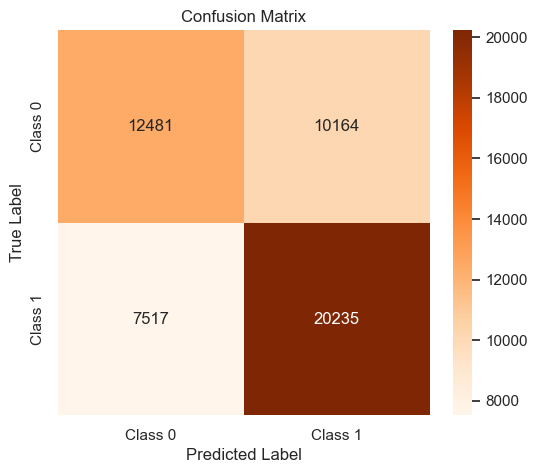

In [27]:

# Define labels
labels = ["Class 0", "Class 1"]

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(final_confusion_matrix, annot=True, fmt='d', cmap='Oranges', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


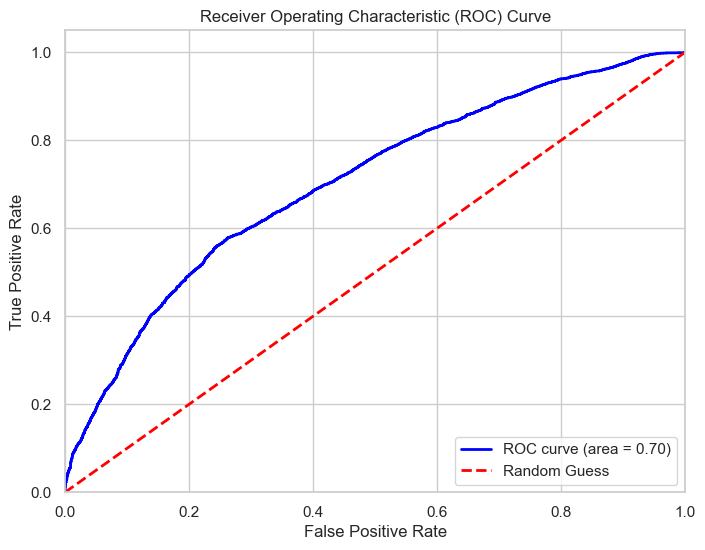

In [60]:
from sklearn.metrics import roc_curve, auc

logistic_predictions_proba = logistic_model.predict_proba(X_test)[:, 1]  # Probabilities of positive class
logistic_fpr, logistic_tpr, logistic_thresholds = roc_curve(y_test, logistic_predictions_proba)
logistic_roc_auc = auc(logistic_fpr, logistic_tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(logistic_fpr, logistic_tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % logistic_roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

KNN:

In [29]:

knn_model = KNeighborsClassifier(n_neighbors=3)

precision_list, recall_list, f1_list, support_list = [], [], [], []

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)

    precision, recall, f1, support = precision_recall_fscore_support(
        y_test, y_pred, labels=[0, 1], zero_division=0
    )
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    support_list.append(support)

avg_precision = np.mean(precision_list, axis=0)
avg_recall = np.mean(recall_list, axis=0)
avg_f1 = np.mean(f1_list, axis=0)
avg_support = np.sum(support_list, axis=0) / kf.get_n_splits()

report = (
    f"K-Nearest Neighbors  (K={kf.get_n_splits()})\n\n"
    f"{'Class':<12}{'Precision':<12}{'Recall':<12}{'F1-Score':<12}{'Support':<12}\n"
)
for i, label in enumerate(["0", "1"]):
    report += (
        f"{label:<12}{avg_precision[i]:<12.2f}{avg_recall[i]:<12.2f}{avg_f1[i]:<12.2f}{avg_support[i]:<12.0f}\n"
    )
report += (
    f"\n{'Accuracy':<12}{np.mean(avg_f1):<12.2f}\n"
    f"{'Macro Avg':<12}{np.mean(avg_precision):<12.2f}{np.mean(avg_recall):<12.2f}{np.mean(avg_f1):<12.2f}{sum(avg_support):<12.0f}\n"
    f"{'Weighted Avg':<12}{np.average(avg_precision, weights=avg_support):<12.2f}{np.average(avg_recall, weights=avg_support):<12.2f}{np.average(avg_f1, weights=avg_support):<12.2f}{sum(avg_support):<12.0f}\n"
)
print(report)


K-Nearest Neighbors  (K=5)

Class       Precision   Recall      F1-Score    Support     
0           0.69        0.70        0.69        4529        
1           0.75        0.74        0.74        5550        

Accuracy    0.72        
Macro Avg   0.72        0.72        0.72        10079       
Weighted Avg0.72        0.72        0.72        10079       



In [30]:
# # Define the parameter grid for hyperparameter tuning
# param_grid = {
#     "n_neighbors": range(1, 21, 2),  # More values for finer tuning
#     "weights": ["uniform", "distance"],
#     "metric": ["euclidean", "manhattan", "minkowski"],
#     "p": [1, 2, 3],  # Optimize distance metric
#     "algorithm": ["auto", "ball_tree", "kd_tree", "brute"]
# }

# # Perform RandomizedSearchCV for faster hyperparameter tuning
# random_search = RandomizedSearchCV(
#     knn_model,
#     param_grid,
#     n_iter=20,  # Randomly sample 20 combinations
#     cv=kf,
#     scoring="accuracy",
#     verbose=1,
#     n_jobs=-1,
#     random_state=42
# )

# # Fit the grid search to the data
# grid_search.fit(X, y)

# # Get the best parameters and the best score
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# print(f"Best Parameters: {best_params}")
# print(f"Best Cross-Validation Accuracy: {best_score:.4f}")

Best Parameters: {'C': 1, 'max_iter': 500, 'penalty': 'l2', 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.6492

In [31]:

# from sklearn.model_selection import GridSearchCV


# # Ensure best_params is from the KNeighborsClassifier grid search
# best_knn_params = grid_search.best_params_

# # Update KNN model with the best parameters
# knn_model = KNeighborsClassifier(
#     n_neighbors=best_knn_params['n_neighbors'],
#     weights=best_knn_params['weights'],
#     metric=best_knn_params['metric'],
#     p=best_knn_params['p'],
#     algorithm=best_knn_params['algorithm']
# )

# # Evaluate the updated model using K-Fold CV
# precision_list, recall_list, f1_list, support_list = [], [], [], []
# confusion_matrices = []

# for train_index, test_index in kf.split(X, y):
#     X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#     y_train, y_test = y.iloc[train_index], y.iloc[test_index]

#     knn_model.fit(X_train, y_train)
#     y_pred = knn_model.predict(X_test)

#     precision, recall, f1, support = precision_recall_fscore_support(
#         y_test, y_pred, labels=[0, 1], zero_division=0
#     )
#     precision_list.append(precision)
#     recall_list.append(recall)
#     f1_list.append(f1)
#     support_list.append(support)
    
#     # Compute and store confusion matrix
#     cm = confusion_matrix(y_test, y_pred)
#     confusion_matrices.append(cm)

# # Compute average precision, recall, f1-score
# avg_precision = np.mean(precision_list, axis=0)
# avg_recall = np.mean(recall_list, axis=0)
# avg_f1 = np.mean(f1_list, axis=0)
# avg_support = np.sum(support_list, axis=0) / kf.get_n_splits()

# # Compute final confusion matrix (sum of all folds)
# final_confusion_matrix = np.sum(confusion_matrices, axis=0)

# # Generate report
# report = (
#     f"K-Nearest Neighbors - Final Evaluation (K={kf.get_n_splits()})\n\n"
#     f"{'Class':<12}{'Precision':<12}{'Recall':<12}{'F1-Score':<12}{'Support':<12}\n"
# )
# for i, label in enumerate(["0", "1"]):
#     report += (
#         f"{label:<12}{avg_precision[i]:<12.2f}{avg_recall[i]:<12.2f}{avg_f1[i]:<12.2f}{avg_support[i]:<12.0f}\n"
#     )
# report += (
#     f"\n{'Accuracy':<12}{np.mean(avg_f1):<12.2f}\n"
#     f"{'Macro Avg':<12}{np.mean(avg_precision):<12.2f}{np.mean(avg_recall):<12.2f}{np.mean(avg_f1):<12.2f}{sum(avg_support):<12.0f}\n"
#     f"{'Weighted Avg':<12}{np.average(avg_precision, weights=avg_support):<12.2f}{np.average(avg_recall, weights=avg_support):<12.2f}{np.average(avg_f1, weights=avg_support):<12.2f}{sum(avg_support):<12.0f}\n"
# )

# print(report)
# print("Final Confusion Matrix:")
# print(final_confusion_matrix)


Manually updated model:

In [32]:

# Update KNN model with the best parameters
knn_model = KNeighborsClassifier(n_neighbors=1, algorithm='auto', leaf_size=30, metric='minkowski', metric_params=None, n_jobs=1, p=2, weights='uniform')

# Evaluate the updated model using K-Fold CV
precision_list, recall_list, f1_list, support_list = [], [], [], []
confusion_matrices = []

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)

    precision, recall, f1, support = precision_recall_fscore_support(
        y_test, y_pred, labels=[0, 1], zero_division=0
    )
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    support_list.append(support)
    
    # Compute and store confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)

# Compute average precision, recall, f1-score
avg_precision = np.mean(precision_list, axis=0)
avg_recall = np.mean(recall_list, axis=0)
avg_f1 = np.mean(f1_list, axis=0)
avg_support = np.sum(support_list, axis=0) / kf.get_n_splits()

# Compute final confusion matrix (sum of all folds)
final_confusion_matrix = np.sum(confusion_matrices, axis=0)

# Generate report
report = (
    f"K-Nearest Neighbors - Final Evaluation (K={kf.get_n_splits()})\n\n"
    f"{'Class':<12}{'Precision':<12}{'Recall':<12}{'F1-Score':<12}{'Support':<12}\n"
)
for i, label in enumerate(["0", "1"]):
    report += (
        f"{label:<12}{avg_precision[i]:<12.2f}{avg_recall[i]:<12.2f}{avg_f1[i]:<12.2f}{avg_support[i]:<12.0f}\n"
    )
report += (
    f"\n{'Accuracy':<12}{np.mean(avg_f1):<12.2f}\n"
    f"{'Macro Avg':<12}{np.mean(avg_precision):<12.2f}{np.mean(avg_recall):<12.2f}{np.mean(avg_f1):<12.2f}{sum(avg_support):<12.0f}\n"
    f"{'Weighted Avg':<12}{np.average(avg_precision, weights=avg_support):<12.2f}{np.average(avg_recall, weights=avg_support):<12.2f}{np.average(avg_f1, weights=avg_support):<12.2f}{sum(avg_support):<12.0f}\n"
)

print(report)
print("Final Confusion Matrix:")
print(final_confusion_matrix)


K-Nearest Neighbors - Final Evaluation (K=5)

Class       Precision   Recall      F1-Score    Support     
0           0.69        0.70        0.70        4529        
1           0.75        0.75        0.75        5550        

Accuracy    0.72        
Macro Avg   0.72        0.72        0.72        10079       
Weighted Avg0.73        0.73        0.73        10079       

Final Confusion Matrix:
[[15869  6776]
 [ 7064 20688]]


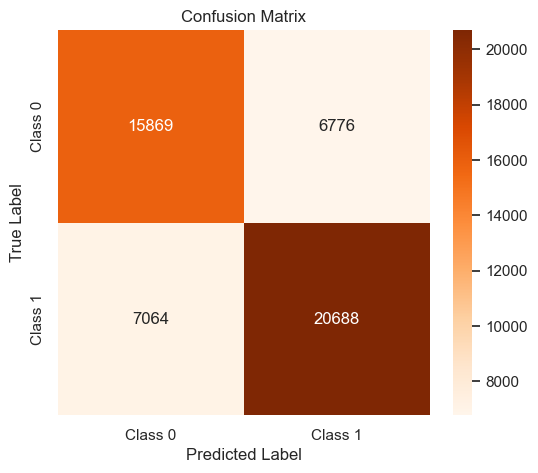

In [33]:
# Visualize the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(final_confusion_matrix, annot=True, fmt='d', cmap='Oranges', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


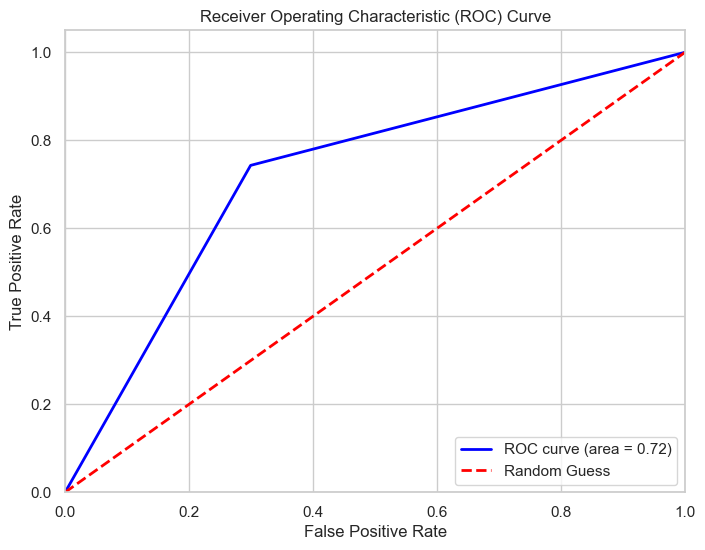

In [61]:
from sklearn.metrics import roc_curve, auc

knn_predictions_proba = knn_model.predict_proba(X_test)[:, 1]  # Probabilities of positive class
knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test, knn_predictions_proba)
knn_roc_auc = auc(knn_fpr, knn_tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(knn_fpr, knn_tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Random Forest:

In [35]:

random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

precision_list, recall_list, f1_list, support_list = [], [], [], []

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    random_forest_model.fit(X_train, y_train)
    y_pred = random_forest_model.predict(X_test)

    precision, recall, f1, support = precision_recall_fscore_support(
        y_test, y_pred, labels=[0, 1], zero_division=0
    )
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    support_list.append(support)

avg_precision = np.mean(precision_list, axis=0)
avg_recall = np.mean(recall_list, axis=0)
avg_f1 = np.mean(f1_list, axis=0)
avg_support = np.sum(support_list, axis=0) / kf.get_n_splits()

report = (
    f"Random Forest  (K={kf.get_n_splits()})\n\n"
    f"{'Class':<12}{'Precision':<12}{'Recall':<12}{'F1-Score':<12}{'Support':<12}\n"
)
for i, label in enumerate(["0", "1"]):
    report += (
        f"{label:<12}{avg_precision[i]:<12.2f}{avg_recall[i]:<12.2f}{avg_f1[i]:<12.2f}{avg_support[i]:<12.0f}\n"
    )
report += (
    f"\n{'Accuracy':<12}{np.mean(avg_f1):<12.2f}\n"
    f"{'Macro Avg':<12}{np.mean(avg_precision):<12.2f}{np.mean(avg_recall):<12.2f}{np.mean(avg_f1):<12.2f}{sum(avg_support):<12.0f}\n"
    f"{'Weighted Avg':<12}{np.average(avg_precision, weights=avg_support):<12.2f}{np.average(avg_recall, weights=avg_support):<12.2f}{np.average(avg_f1, weights=avg_support):<12.2f}{sum(avg_support):<12.0f}\n"
)
print(report)


Random Forest - Final Evaluation (K=5)

Class       Precision   Recall      F1-Score    Support     
0           0.99        0.99        0.99        4529        
1           0.99        0.99        0.99        5550        

Accuracy    0.99        
Macro Avg   0.99        0.99        0.99        10079       
Weighted Avg0.99        0.99        0.99        10079       



In [36]:
# # Define the expanded parameter grid for hyperparameter tuning
# param_grid = {
#     "n_estimators": [50, 100, 200, 300, 500],  # Number of trees in the forest
#     "max_depth": [None, 10, 20, 30, 40],  # Depth of trees
#     "min_samples_split": [2, 5, 10],  # Minimum samples to split
#     "min_samples_leaf": [1, 2, 4],  # Minimum samples per leaf
#     "bootstrap": [True, False],  # Bootstrap sampling
#     "max_features": ["auto", "sqrt", "log2"],  # Number of features to consider
#     "criterion": ["gini", "entropy"],  # Splitting criterion
#     "class_weight": [None, "balanced"]  # Handle class imbalance
# }

# # Perform RandomizedSearchCV for hyperparameter tuning
# random_search = RandomizedSearchCV(
#     RandomForestClassifier(random_state=42),
#     param_grid,
#     n_iter=20,  # Randomly sample 20 combinations
#     cv=kf,
#     scoring="accuracy",
#     verbose=1,
#     n_jobs=1,  # Use single job to avoid pickling issues
#     random_state=42
# )


# # Fit the randomized search to the data
# random_search.fit(X, y)

# # Get the best parameters and the best score
# best_params = random_search.best_params_
# best_score = random_search.best_score_

# print(f"Best Parameters: {best_params}")
# print(f"Best Cross-Validation Accuracy: {best_score:.4f}")

Best Parameters: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 40, 'criterion': 'entropy', 'class_weight': 'balanced', 'bootstrap': False}
Best Cross-Validation Accuracy: 0.9895

Manually updated model:

In [37]:
# Update Random Forest model with the best parameters
random_forest_model = RandomForestClassifier(
    n_estimators=500,
    max_depth=40,
    min_samples_split=5,
    min_samples_leaf=2,
    bootstrap=False,
    max_features='sqrt',
    criterion='entropy',
    class_weight='balanced',
    random_state=42
)

# Evaluate the updated model using K-Fold CV
precision_list, recall_list, f1_list, support_list = [], [], [], []
confusion_matrices = []

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    random_forest_model.fit(X_train, y_train)
    y_pred = random_forest_model.predict(X_test)

    precision, recall, f1, support = precision_recall_fscore_support(
        y_test, y_pred, labels=[0, 1], zero_division=0
    )
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    support_list.append(support)
    
    # Compute and store confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)

# Compute average precision, recall, f1-score
avg_precision = np.mean(precision_list, axis=0)
avg_recall = np.mean(recall_list, axis=0)
avg_f1 = np.mean(f1_list, axis=0)
avg_support = np.sum(support_list, axis=0) / kf.get_n_splits()

# Compute final confusion matrix (sum of all folds)
final_confusion_matrix = np.sum(confusion_matrices, axis=0)

# Generate report
report = (
    f"Random Forest - Final Evaluation (K={kf.get_n_splits()})\n\n"
    f"{'Class':<12}{'Precision':<12}{'Recall':<12}{'F1-Score':<12}{'Support':<12}\n"
)
for i, label in enumerate(["0", "1"]):
    report += (
        f"{label:<12}{avg_precision[i]:<12.2f}{avg_recall[i]:<12.2f}{avg_f1[i]:<12.2f}{avg_support[i]:<12.0f}\n"
    )
report += (
    f"\n{'Accuracy':<12}{np.mean(avg_f1):<12.2f}\n"
    f"{'Macro Avg':<12}{np.mean(avg_precision):<12.2f}{np.mean(avg_recall):<12.2f}{np.mean(avg_f1):<12.2f}{sum(avg_support):<12.0f}\n"
    f"{'Weighted Avg':<12}{np.average(avg_precision, weights=avg_support):<12.2f}{np.average(avg_recall, weights=avg_support):<12.2f}{np.average(avg_f1, weights=avg_support):<12.2f}{sum(avg_support):<12.0f}\n"
)

print(report)
print("Final Confusion Matrix:")
print(final_confusion_matrix)


Random Forest - Final Evaluation (K=5)

Class       Precision   Recall      F1-Score    Support     
0           0.99        0.99        0.99        4529        
1           0.99        0.99        0.99        5550        

Accuracy    0.99        
Macro Avg   0.99        0.99        0.99        10079       
Weighted Avg0.99        0.99        0.99        10079       

Final Confusion Matrix:
[[22399   246]
 [  289 27463]]


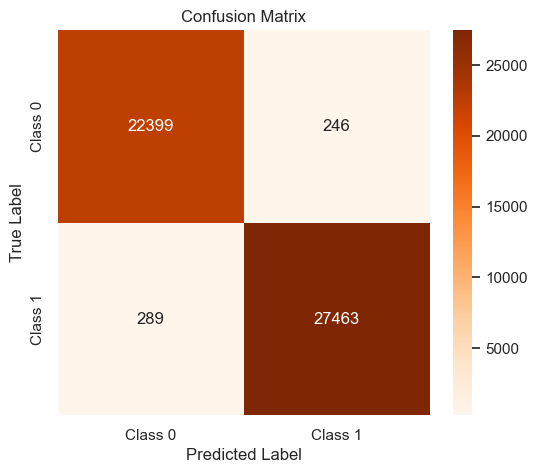

In [38]:
# Visualize the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(final_confusion_matrix, annot=True, fmt='d', cmap='Oranges', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


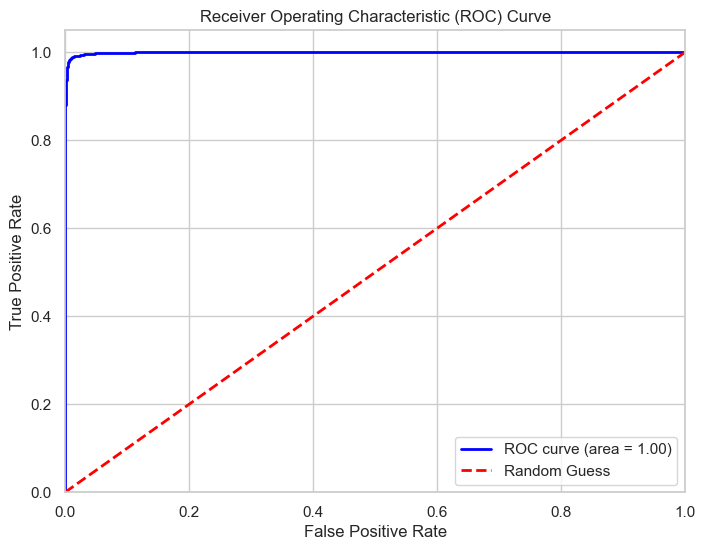

In [62]:
from sklearn.metrics import roc_curve, auc

rf_predictions_proba = random_forest_model.predict_proba(X_test)[:, 1]  # Probabilities of positive class
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_predictions_proba)
rf_roc_auc = auc(rf_fpr, rf_tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

##########################################################################
##########################################################################
##########################################################################

Deep Learning Models:

Fully Connected Neural Network (Feedforward Neural Network):

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score

# Build MLP Model
mlp_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile Model
mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train Model
history = mlp_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate Model
y_pred_probs = mlp_model.predict(X_test).flatten()
y_pred = (y_pred_probs > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Epoch 1/20


C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1260/1260 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5352 - loss: 5.6736 - val_accuracy: 0.5582 - val_loss: 0.6703
Epoch 2/20
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5504 - loss: 0.6703 - val_accuracy: 0.5576 - val_loss: 0.6695
Epoch 3/20
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5465 - loss: 0.6719 - val_accuracy: 0.5576 - val_loss: 0.6667
Epoch 4/20
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5498 - loss: 0.6676 - val_accuracy: 0.5576 - val_loss: 0.6666
Epoch 5/20
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5488 - loss: 0.6680 - val_accuracy: 0.5568 - val_loss: 0.6675
Epoch 6/20
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5521 - loss: 0.6673 - val_accuracy: 0.5576 - val_loss: 0.6695
Epoch 7/20
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5473 - loss: 0.6690 - val_accuracy: 0.5576 - val_loss: 0.6696
Epoch 8/20
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5481 - loss: 0.6686 - val_accurac

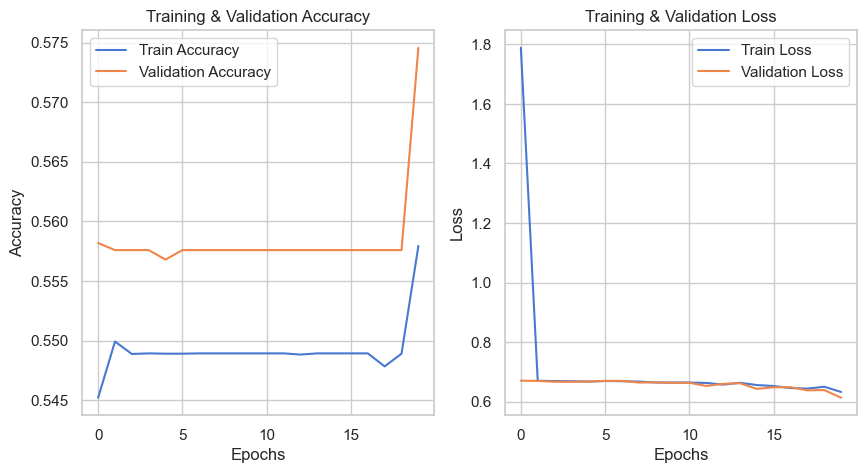

In [41]:
# Plot Training History
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training & Validation Loss')
plt.show()


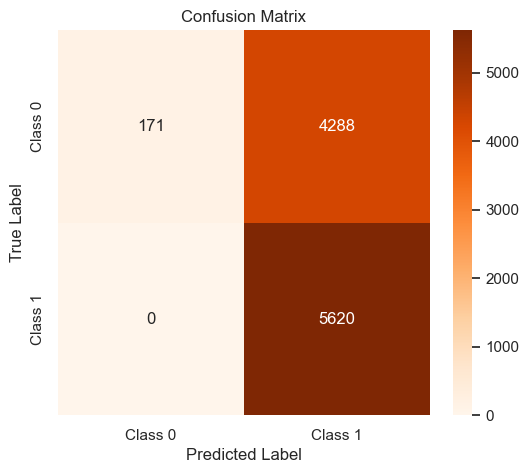

In [42]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Hyperparameter Tuning:

C:\Users\Dorra\AppData\Local\Temp\ipykernel_21480\274991117.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt
C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Reloading Tuner from tuning_dir\mlp_tuning\tuner0.json
Best Hyperparameters: {'units1': 128, 'units2': 256, 'dropout': 0.2, 'lr': 0.0001}
Epoch 1/20
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5295 - loss: 11.3214 - val_accuracy: 0.6085 - val_loss: 0.8422
Epoch 2/20
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5773 - loss: 0.8672 - val_accuracy: 0.6077 - val_loss: 0.6489
Epoch 3/20
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6146 - loss: 0.6601 - val_accuracy: 0.6117 - val_loss: 0.6578
Epoch 4/20
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6261 - loss: 0.6451 - val_accuracy: 0.6344 - val_loss: 0.6373
Epoch 5/20
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6238 - loss: 0.6456 - val_accuracy: 0.6317 - val_loss: 0.6339
Epoch 6/20
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6311 - loss: 0.6355 - val_accuracy: 0.6478 - val_loss: 0.6252
Epoch 7/20
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6394 - loss: 

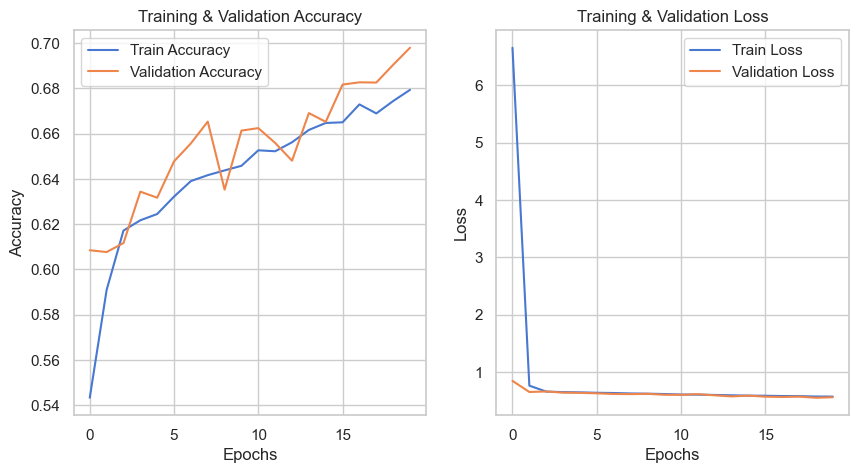

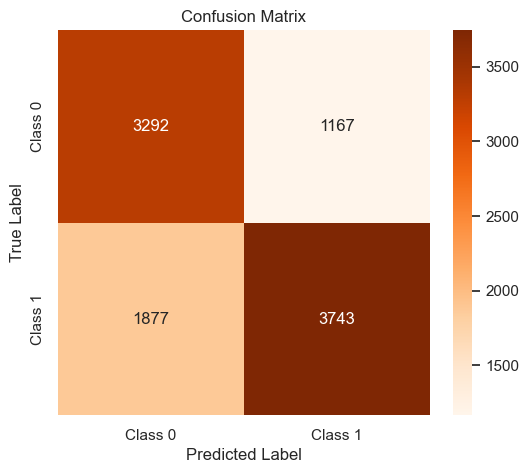

In [43]:
import kerastuner as kt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

##################### VERSION 2
# Function to build model for hyperparameter tuning
def build_model(hp):
    mlp_model = Sequential([
        Dense(hp.Int('units1', min_value=32, max_value=256, step=32), activation='relu', input_shape=(X_train.shape[1],)),
        Dense(hp.Int('units2', min_value=32, max_value=256, step=32), activation='relu'),
        Dropout(hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1)),
        Dense(1, activation='sigmoid')
    ])
    mlp_model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp.Choice('lr', [0.001, 0.0005, 0.0001])),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return mlp_model

# Hyperparameter tuning
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=2,
    directory='tuning_dir',
    project_name='mlp_tuning'
)

tuner.search(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best Hyperparameters: {best_hps.values}")

# Build and train model with best hyperparameters
mlp_model = build_model(best_hps)
history = mlp_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate Model
y_pred_probs = mlp_model.predict(X_test).flatten()
y_pred = (y_pred_probs > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Plot Training History
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training & Validation Loss')
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


Best Hyperparameters: {'units1': 128, 'units2': 256, 'dropout': 0.2, 'lr': 0.0001}


Early Stopping:

Epoch 1/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7200 - loss: 0.5024 - val_accuracy: 0.7284 - val_loss: 0.4907
Epoch 2/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7156 - loss: 0.5057 - val_accuracy: 0.7204 - val_loss: 0.4962
Epoch 3/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7251 - loss: 0.4966 - val_accuracy: 0.7232 - val_loss: 0.4947
Epoch 4/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7204 - loss: 0.5011 - val_accuracy: 0.7341 - val_loss: 0.4899
Epoch 5/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7211 - loss: 0.5028 - val_accuracy: 0.7365 - val_loss: 0.4826
Epoch 6/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7194 - loss: 0.4996 - val_accuracy: 0.7295 - val_loss: 0.4854
Epoch 7/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7196 - loss: 0.4974 - val_accuracy: 0.7307 - val_loss: 0.4788
Epoch 8/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7226 - loss: 0.4953 - 

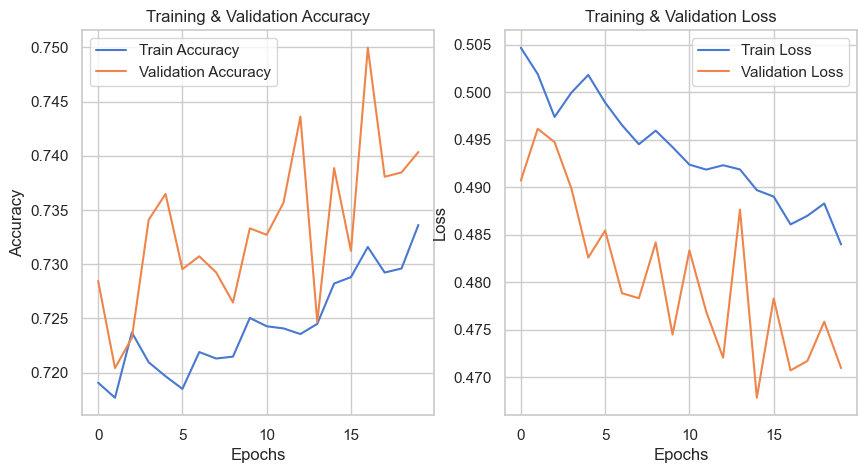

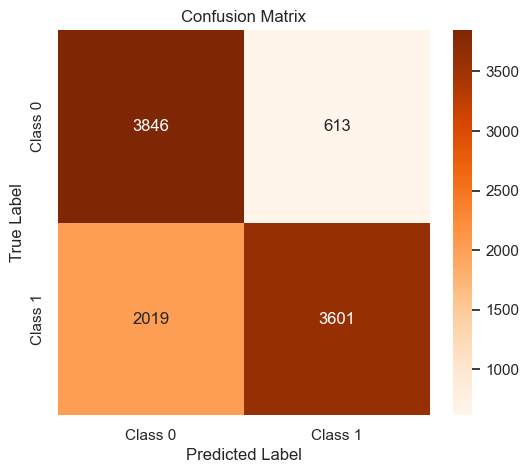

In [64]:
# Implement Early Stopping
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

# Train Model
history = mlp_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate Model
y_pred_probs = mlp_model.predict(X_test).flatten()
y_pred = (y_pred_probs > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Plot Training History
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training & Validation Loss')
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

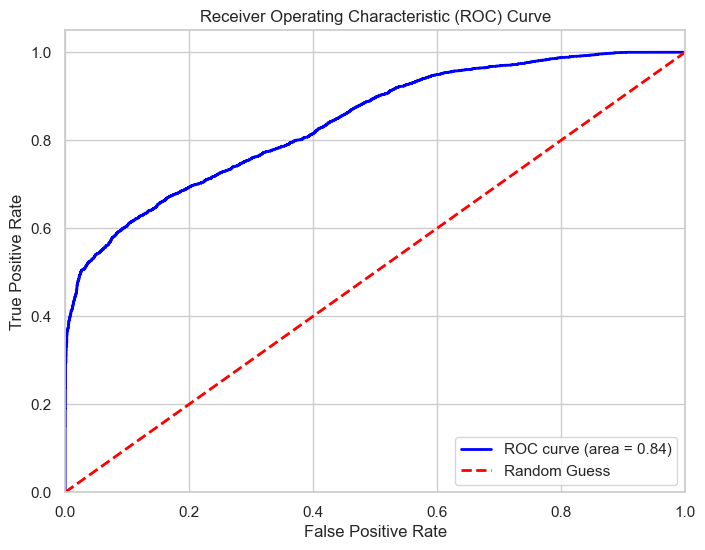

In [65]:
# Compute ROC curve and ROC area for the MLP model
mlp_fpr, mlp_tpr, _ = roc_curve(y_test, y_pred_probs)
mlp_roc_auc = auc(mlp_fpr, mlp_tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(mlp_fpr, mlp_tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % mlp_roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


TabNet:

C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.52838 | val_0_accuracy: 0.72676 |  0:00:05s
epoch 1  | loss: 0.4132  | val_0_accuracy: 0.83282 |  0:00:10s
epoch 2  | loss: 0.36626 | val_0_accuracy: 0.86705 |  0:00:15s
epoch 3  | loss: 0.31174 | val_0_accuracy: 0.90078 |  0:00:22s
epoch 4  | loss: 0.28821 | val_0_accuracy: 0.90297 |  0:00:26s
epoch 5  | loss: 0.25746 | val_0_accuracy: 0.92589 |  0:00:31s
epoch 6  | loss: 0.233   | val_0_accuracy: 0.924   |  0:00:35s
epoch 7  | loss: 0.22144 | val_0_accuracy: 0.93293 |  0:00:39s
epoch 8  | loss: 0.21591 | val_0_accuracy: 0.93759 |  0:00:43s
epoch 9  | loss: 0.21768 | val_0_accuracy: 0.93481 |  0:00:46s
epoch 10 | loss: 0.2018  | val_0_accuracy: 0.93432 |  0:00:50s
epoch 11 | loss: 0.1929  | val_0_accuracy: 0.91209 |  0:00:54s
epoch 12 | loss: 0.18921 | val_0_accuracy: 0.93769 |  0:00:58s
epoch 13 | loss: 0.19136 | val_0_accuracy: 0.94107 |  0:01:03s
epoch 14 | loss: 0.1913  | val_0_accuracy: 0.92281 |  0:01:09s
epoch 15 | loss: 0.19495 | val_0_accuracy: 0.94305 |  0

C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Accuracy: 0.9761
Precision: 0.9798
Recall: 0.9772
F1-Score: 0.9785


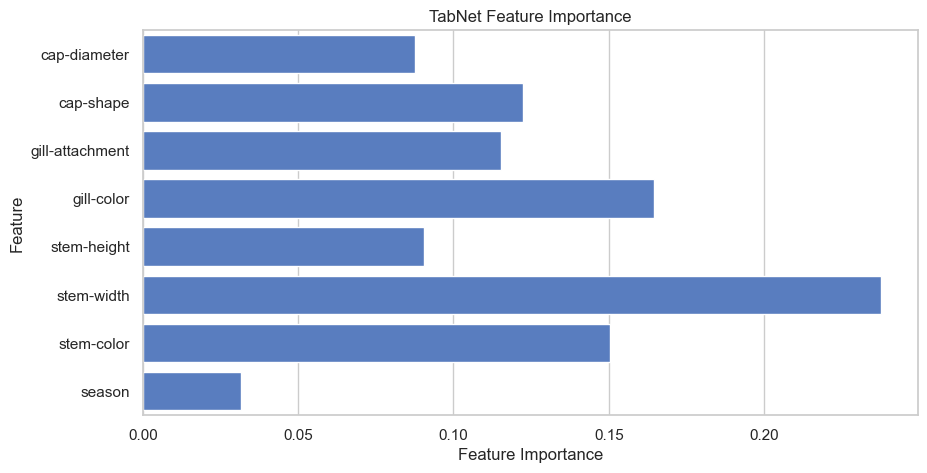

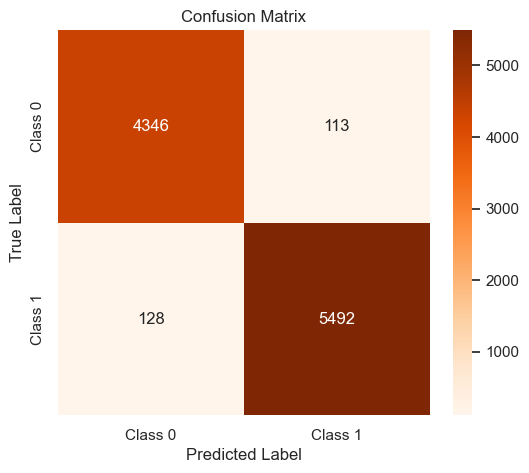

In [67]:
from pytorch_tabnet.tab_model import TabNetClassifier

# Convert to float32 (required for TabNet)
X_train, X_test = X_train.astype(np.float32), X_test.astype(np.float32)

# Initialize and Train TabNet Model
tabnet_model = TabNetClassifier()
tabnet_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric=['accuracy'],
    patience=10,
    max_epochs=100,
    batch_size=256,
    virtual_batch_size=128,
    num_workers=0
)

# Predictions
y_pred_probs = tabnet_model.predict_proba(X_test)[:, 1]
y_pred = (y_pred_probs > 0.5).astype(int)

# Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Feature Importance
feature_importances = tabnet_model.feature_importances_
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances, y=X.columns)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("TabNet Feature Importance")
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


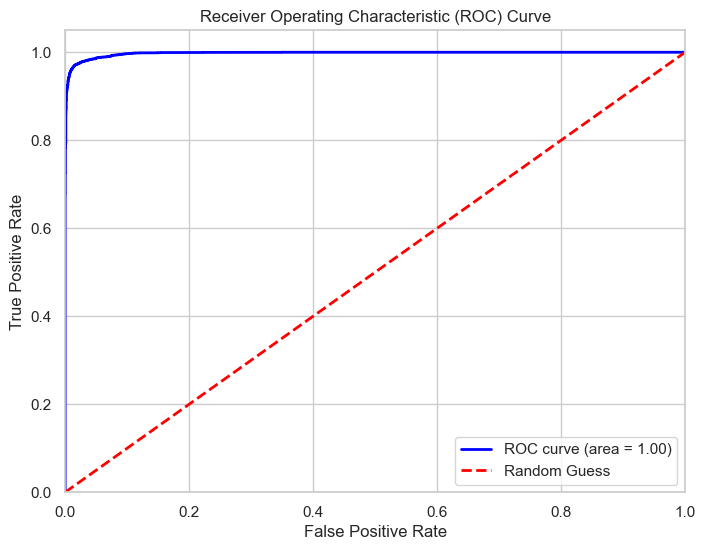

In [70]:
# Compute ROC curve and ROC area for the TabNet model
tabnet_fpr, tabnet_tpr, _ = roc_curve(y_test, y_pred_probs)
tabnet_roc_auc = auc(tabnet_fpr, tabnet_tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(tabnet_fpr, tabnet_tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % tabnet_roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

ANN:

In [ ]:
# from keras.optimizers import Adam, RMSprop, SGD
# from keras.layers import Dense, Dropout, BatchNormalization
# import optuna

# # Define the objective function for Optuna
# def objective(trial):
#     # Hyperparameters to tune
#     num_layers = trial.suggest_int("num_layers", 2, 5)
#     num_neurons = trial.suggest_int("num_neurons", 32, 256)
#     dropout_rate = trial.suggest_float("dropout_rate", 0.1, 0.5)
#     learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
#     batch_size = trial.suggest_categorical("batch_size", [32, 64, 128, 256])
#     optimizer_name = trial.suggest_categorical("optimizer", ["adam", "rmsprop", "sgd"])

#     # Select optimizer
#     if optimizer_name == "adam":
#         optimizer = Adam(learning_rate=learning_rate)
#     elif optimizer_name == "rmsprop":
#         optimizer = RMSprop(learning_rate=learning_rate)
#     else:
#         optimizer = SGD(learning_rate=learning_rate, momentum=0.9)

#     # Define ANN model
#     ann_model = Sequential()
#     ann_model.add(Dense(num_neurons, activation="relu", input_shape=(X_train.shape[1],)))
#     ann_model.add(BatchNormalization())
#     ann_model.add(Dropout(dropout_rate))

#     # Add hidden layers dynamically
#     for _ in range(num_layers - 1):
#         ann_model.add(Dense(num_neurons, activation="relu"))
#         ann_model.add(BatchNormalization())
#         ann_model.add(Dropout(dropout_rate))

#     # Output layer
#     ann_model.add(Dense(1, activation="sigmoid"))

#     # Compile the model
#     ann_model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])

#     # Train model with early stopping
#     early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)
#     history = ann_model.fit(X_train, y_train, epochs=50, batch_size=batch_size, validation_data=(X_test, y_test),
#                         verbose=0, callbacks=[early_stopping])

#     # Make predictions
#     y_pred_prob = ann_model.predict(X_test)
#     y_pred_binary = (y_pred_prob > 0.5).astype(int)

#     # Compute F1-score
#     _, _, f1, _ = precision_recall_fscore_support(y_test, y_pred_binary, average="macro")

#     return f1  # Optimize for macro F1-score

# # Run Optuna study to find the best hyperparameters
# study = optuna.create_study(direction="maximize")
# study.optimize(objective, n_trials=20)

# # Retrieve the best hyperparameters
# best_params = study.best_params
# print("Best Hyperparameters:", best_params)

[I 2025-01-25 18:23:18,240] A new study created in memory with name: no-name-b32728bd-ed9f-4a84-a629-70ff9e3ed099
C:\Users\Dorra\AppData\Local\Temp\ipykernel_21480\3957075447.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


[I 2025-01-25 18:27:11,126] Trial 0 finished with value: 0.7611785258128877 and parameters: {'num_layers': 5, 'num_neurons': 92, 'dropout_rate': 0.23142507643368618, 'learning_rate': 0.0053138645955351374, 'batch_size': 32, 'optimizer': 'adam'}. Best is trial 0 with value: 0.7611785258128877.
C:\Users\Dorra\AppData\Local\Temp\ipykernel_21480\3957075447.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


315/315 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2025-01-25 18:27:58,805] Trial 1 finished with value: 0.7106821900601591 and parameters: {'num_layers': 4, 'num_neurons': 59, 'dropout_rate': 0.4543324515169014, 'learning_rate': 0.0004661824751313373, 'batch_size': 256, 'optimizer': 'adam'}. Best is trial 0 with value: 0.7611785258128877.
C:\Users\Dorra\AppData\Local\Temp\ipykernel_21480\3957075447.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


315/315 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2025-01-25 18:28:56,629] Trial 2 finished with value: 0.663146291920987 and parameters: {'num_layers': 4, 'num_neurons': 114, 'dropout_rate': 0.14407030607268967, 'learning_rate': 0.0009787619070144526, 'batch_size': 128, 'optimizer': 'sgd'}. Best is trial 0 with value: 0.7611785258128877.
C:\Users\Dorra\AppData\Local\Temp\ipykernel_21480\3957075447.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


[I 2025-01-25 18:29:56,060] Trial 3 finished with value: 0.9359618493280797 and parameters: {'num_layers': 3, 'num_neurons': 86, 'dropout_rate': 0.11742168564334904, 'learning_rate': 0.005433171756846039, 'batch_size': 128, 'optimizer': 'adam'}. Best is trial 3 with value: 0.9359618493280797.
C:\Users\Dorra\AppData\Local\Temp\ipykernel_21480\3957075447.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


[I 2025-01-25 18:32:55,631] Trial 4 finished with value: 0.6665591139864002 and parameters: {'num_layers': 4, 'num_neurons': 131, 'dropout_rate': 0.34372538935574515, 'learning_rate': 0.008035826529910165, 'batch_size': 32, 'optimizer': 'adam'}. Best is trial 3 with value: 0.9359618493280797.
C:\Users\Dorra\AppData\Local\Temp\ipykernel_21480\3957075447.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


[I 2025-01-25 18:34:57,009] Trial 5 finished with value: 0.860130970392869 and parameters: {'num_layers': 4, 'num_neurons': 165, 'dropout_rate': 0.2490900185829682, 'learning_rate': 0.008942147728302468, 'batch_size': 64, 'optimizer': 'rmsprop'}. Best is trial 3 with value: 0.9359618493280797.
C:\Users\Dorra\AppData\Local\Temp\ipykernel_21480\3957075447.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


[I 2025-01-25 18:35:52,482] Trial 6 finished with value: 0.9057946900425643 and parameters: {'num_layers': 5, 'num_neurons': 103, 'dropout_rate': 0.23177918459428526, 'learning_rate': 0.0008450444354215314, 'batch_size': 256, 'optimizer': 'adam'}. Best is trial 3 with value: 0.9359618493280797.
C:\Users\Dorra\AppData\Local\Temp\ipykernel_21480\3957075447.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


[I 2025-01-25 18:36:47,511] Trial 7 finished with value: 0.7515256411444566 and parameters: {'num_layers': 5, 'num_neurons': 49, 'dropout_rate': 0.13736447803243143, 'learning_rate': 0.00605283580026657, 'batch_size': 64, 'optimizer': 'rmsprop'}. Best is trial 3 with value: 0.9359618493280797.
C:\Users\Dorra\AppData\Local\Temp\ipykernel_21480\3957075447.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


[I 2025-01-25 18:38:56,675] Trial 8 finished with value: 0.8010902971910827 and parameters: {'num_layers': 5, 'num_neurons': 121, 'dropout_rate': 0.3075880257275772, 'learning_rate': 0.00010928237739961339, 'batch_size': 64, 'optimizer': 'adam'}. Best is trial 3 with value: 0.9359618493280797.
C:\Users\Dorra\AppData\Local\Temp\ipykernel_21480\3957075447.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


315/315 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


[I 2025-01-25 18:39:20,066] Trial 9 finished with value: 0.6300392204823944 and parameters: {'num_layers': 2, 'num_neurons': 47, 'dropout_rate': 0.31430890067916306, 'learning_rate': 0.0001887137515279796, 'batch_size': 128, 'optimizer': 'sgd'}. Best is trial 3 with value: 0.9359618493280797.
C:\Users\Dorra\AppData\Local\Temp\ipykernel_21480\3957075447.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


[I 2025-01-25 18:40:18,595] Trial 10 finished with value: 0.7864522428613668 and parameters: {'num_layers': 2, 'num_neurons': 230, 'dropout_rate': 0.4269899020137402, 'learning_rate': 0.00256388495169484, 'batch_size': 128, 'optimizer': 'rmsprop'}. Best is trial 3 with value: 0.9359618493280797.
C:\Users\Dorra\AppData\Local\Temp\ipykernel_21480\3957075447.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


315/315 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2025-01-25 18:40:54,042] Trial 11 finished with value: 0.9642286067942563 and parameters: {'num_layers': 3, 'num_neurons': 164, 'dropout_rate': 0.10439015693267226, 'learning_rate': 0.0017539414374108486, 'batch_size': 256, 'optimizer': 'adam'}. Best is trial 11 with value: 0.9642286067942563.
C:\Users\Dorra\AppData\Local\Temp\ipykernel_21480\3957075447.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


[I 2025-01-25 18:41:37,215] Trial 12 finished with value: 0.9488434902137346 and parameters: {'num_layers': 3, 'num_neurons': 178, 'dropout_rate': 0.11264610994610257, 'learning_rate': 0.002455173186031404, 'batch_size': 256, 'optimizer': 'adam'}. Best is trial 11 with value: 0.9642286067942563.
C:\Users\Dorra\AppData\Local\Temp\ipykernel_21480\3957075447.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


[I 2025-01-25 18:42:18,178] Trial 13 finished with value: 0.9480118420041155 and parameters: {'num_layers': 3, 'num_neurons': 187, 'dropout_rate': 0.18082048624986952, 'learning_rate': 0.0020391060014996647, 'batch_size': 256, 'optimizer': 'adam'}. Best is trial 11 with value: 0.9642286067942563.
C:\Users\Dorra\AppData\Local\Temp\ipykernel_21480\3957075447.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


[I 2025-01-25 18:42:58,489] Trial 14 finished with value: 0.6731936323820193 and parameters: {'num_layers': 3, 'num_neurons': 205, 'dropout_rate': 0.10071163951689505, 'learning_rate': 0.002305044971358262, 'batch_size': 256, 'optimizer': 'sgd'}. Best is trial 11 with value: 0.9642286067942563.
C:\Users\Dorra\AppData\Local\Temp\ipykernel_21480\3957075447.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


315/315 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2025-01-25 18:44:00,712] Trial 15 finished with value: 0.9532608965633527 and parameters: {'num_layers': 3, 'num_neurons': 255, 'dropout_rate': 0.18098638451166443, 'learning_rate': 0.0005264435971217232, 'batch_size': 256, 'optimizer': 'adam'}. Best is trial 11 with value: 0.9642286067942563.
C:\Users\Dorra\AppData\Local\Temp\ipykernel_21480\3957075447.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


[I 2025-01-25 18:44:46,165] Trial 16 finished with value: 0.9073740584713318 and parameters: {'num_layers': 2, 'num_neurons': 256, 'dropout_rate': 0.18365179265782483, 'learning_rate': 0.00036339285642462185, 'batch_size': 256, 'optimizer': 'adam'}. Best is trial 11 with value: 0.9642286067942563.
C:\Users\Dorra\AppData\Local\Temp\ipykernel_21480\3957075447.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


315/315 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step


[I 2025-01-25 18:45:27,830] Trial 17 finished with value: 0.9434078270212917 and parameters: {'num_layers': 3, 'num_neurons': 154, 'dropout_rate': 0.1775627500573585, 'learning_rate': 0.0005432186748685196, 'batch_size': 256, 'optimizer': 'adam'}. Best is trial 11 with value: 0.9642286067942563.
C:\Users\Dorra\AppData\Local\Temp\ipykernel_21480\3957075447.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


315/315 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2025-01-25 18:46:01,930] Trial 18 finished with value: 0.8098478840015332 and parameters: {'num_layers': 2, 'num_neurons': 223, 'dropout_rate': 0.3796385298439381, 'learning_rate': 0.0014343736752187586, 'batch_size': 256, 'optimizer': 'rmsprop'}. Best is trial 11 with value: 0.9642286067942563.
C:\Users\Dorra\AppData\Local\Temp\ipykernel_21480\3957075447.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


[I 2025-01-25 18:46:58,013] Trial 19 finished with value: 0.6367121735966222 and parameters: {'num_layers': 3, 'num_neurons': 256, 'dropout_rate': 0.2502708030016272, 'learning_rate': 0.000241540494072505, 'batch_size': 32, 'optimizer': 'sgd'}. Best is trial 11 with value: 0.9642286067942563.


Best Hyperparameters: {'num_layers': 3, 'num_neurons': 164, 'dropout_rate': 0.10439015693267226, 'learning_rate': 0.0017539414374108486, 'batch_size': 256, 'optimizer': 'adam'}


Best Hyperparameters: {'num_layers': 3, 'num_neurons': 164, 'dropout_rate': 0.10439015693267226, 'learning_rate': 0.0017539414374108486, 'batch_size': 256, 'optimizer': 'adam'}


Epoch 1/100


C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


158/158 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6080 - loss: 0.6889 - val_accuracy: 0.6416 - val_loss: 0.6264
Epoch 2/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6692 - loss: 0.5945 - val_accuracy: 0.6475 - val_loss: 0.6287
Epoch 3/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7000 - loss: 0.5537 - val_accuracy: 0.6688 - val_loss: 0.6109
Epoch 4/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7284 - loss: 0.5189 - val_accuracy: 0.6991 - val_loss: 0.5678
Epoch 5/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7470 - loss: 0.4883 - val_accuracy: 0.7091 - val_loss: 0.5354
Epoch 6/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7525 - loss: 0.4794 - val_accuracy: 0.6440 - val_loss: 0.9300
Epoch 7/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7622 - loss: 0.4636 - val_accuracy: 0.7528 - val_loss: 0.4864
Epoch 8/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7855 - loss: 0.4348 - val_accuracy: 0.7401

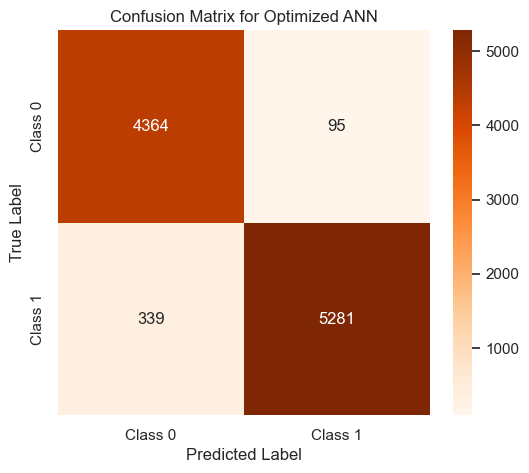

In [76]:
# Train final ANN model with the best parameters
ann_model = Sequential()
ann_model.add(Dense(164, activation="relu", input_shape=(X_train.shape[1],)))
ann_model.add(BatchNormalization())
ann_model.add(Dropout(0.10439015693267226))

for _ in range(3 - 1):
    ann_model.add(Dense(164, activation="relu"))
    ann_model.add(BatchNormalization())
    ann_model.add(Dropout(0.10439015693267226))

ann_model.add(Dense(1, activation="sigmoid"))

# Select optimizer
if best_params["optimizer"] == "adam":
    optimizer = Adam(learning_rate=0.0017539414374108486)
elif 'adam' == "rmsprop":
    optimizer = RMSprop(learning_rate=0.0017539414374108486)
else:
    optimizer = SGD(learning_rate=0.0017539414374108486, momentum=0.9)

# Compile model
ann_model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])

# Train the final model
history = ann_model.fit(X_train, y_train, epochs=100, batch_size=256, validation_data=(X_test, y_test),
                    verbose=1, callbacks=[keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)])

# Make final predictions
y_pred_prob = ann_model.predict(X_test)
y_pred_binary = (y_pred_prob > 0.5).astype(int)

# Compute final performance metrics
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred_binary, labels=[0, 1], zero_division=0)
accuracy = accuracy_score(y_test, y_pred_binary)
cm = confusion_matrix(y_test, y_pred_binary)

# Print evaluation report
report = f"""
ANN - Optimized Model Evaluation

{'Class':<12}{'Precision':<12}{'Recall':<12}{'F1-Score':<12}{'Support':<12}
{'-'*55}
{0:<12}{precision[0]:<12.2f}{recall[0]:<12.2f}{f1[0]:<12.2f}{int(support[0]):<12}
{1:<12}{precision[1]:<12.2f}{recall[1]:<12.2f}{f1[1]:<12.2f}{int(support[1]):<12}

{'Accuracy':<12}{accuracy:<12.2f}
{'Macro Avg':<12}{np.mean(precision):<12.2f}{np.mean(recall):<12.2f}{np.mean(f1):<12.2f}{sum(support):<12}
"""

print(report)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Optimized ANN")
plt.show()

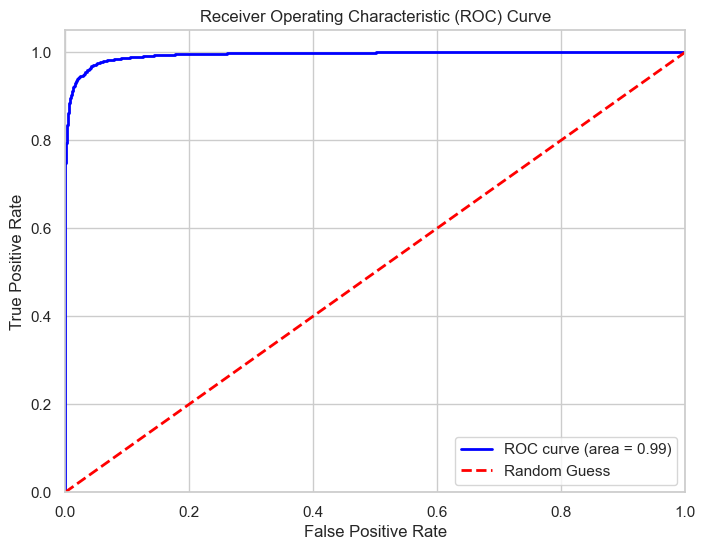

In [77]:
# Compute ROC curve and ROC area for the ANN model
ann_fpr, ann_tpr, _ = roc_curve(y_test, y_pred_prob)
ann_roc_auc = auc(ann_fpr, ann_tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(ann_fpr, ann_tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % ann_roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Logistic Regression  (K=5)

Class       Precision   Recall      F1-Score    Support     
0           0.62        0.55        0.59        4529        
1           0.67        0.73        0.70        5550        

Accuracy    0.64        
Macro Avg   0.64        0.64        0.64        10079       
Weighted Avg0.65        0.65        0.65        10079       

Final Confusion Matrix:
[[12481 10164]
 [ 7517 20235]]


 K-Nearest Neighbors - Final Evaluation (K=5)

Class       Precision   Recall      F1-Score    Support     
0           0.69        0.70        0.70        4529        
1           0.75        0.75        0.75        5550        

Accuracy    0.72        
Macro Avg   0.72        0.72        0.72        10079       
Weighted Avg0.73        0.73        0.73        10079       

Final Confusion Matrix:
[[15869  6776]
 [ 7064 20688]]

 Random Forest - Final Evaluation (K=5)

Class       Precision   Recall      F1-Score    Support     
0           0.99        0.99        0.99        4529        
1           0.99        0.99        0.99        5550        

Accuracy    0.99        
Macro Avg   0.99        0.99        0.99        10079       
Weighted Avg0.99        0.99        0.99        10079       

Final Confusion Matrix:
[[22399   246]
 [  289 27463]]


MLP:
 Accuracy: 0.7366
Precision: 0.8194
Recall: 0.6767
F1-Score: 0.7413


Tabnet:
Accuracy: 0.9761
Precision: 0.9798
Recall: 0.9772
F1-Score: 0.9785


ANN - Optimized Model Evaluation:

Class       Precision   Recall      F1-Score    Support     
-------------------------------------------------------
0           0.95        0.97        0.96        4459        
1           0.98        0.96        0.97        5620        

Accuracy    0.97        
Macro Avg   0.96        0.97        0.97        10079      

~##################################################################################################################


Comparison:

C:\Users\Dorra\AppData\Local\Temp\ipykernel_21480\1280250336.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=data[i], palette="viridis")
C:\Users\Dorra\AppData\Local\Temp\ipykernel_21480\1280250336.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=data[i], palette="viridis")
C:\Users\Dorra\AppData\Local\Temp\ipykernel_21480\1280250336.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=data[i], palette="viridis")
C:\Users\Dorra\AppData\Local\Temp\ipykernel_21480\1280250336.py:38: FutureWarning: 



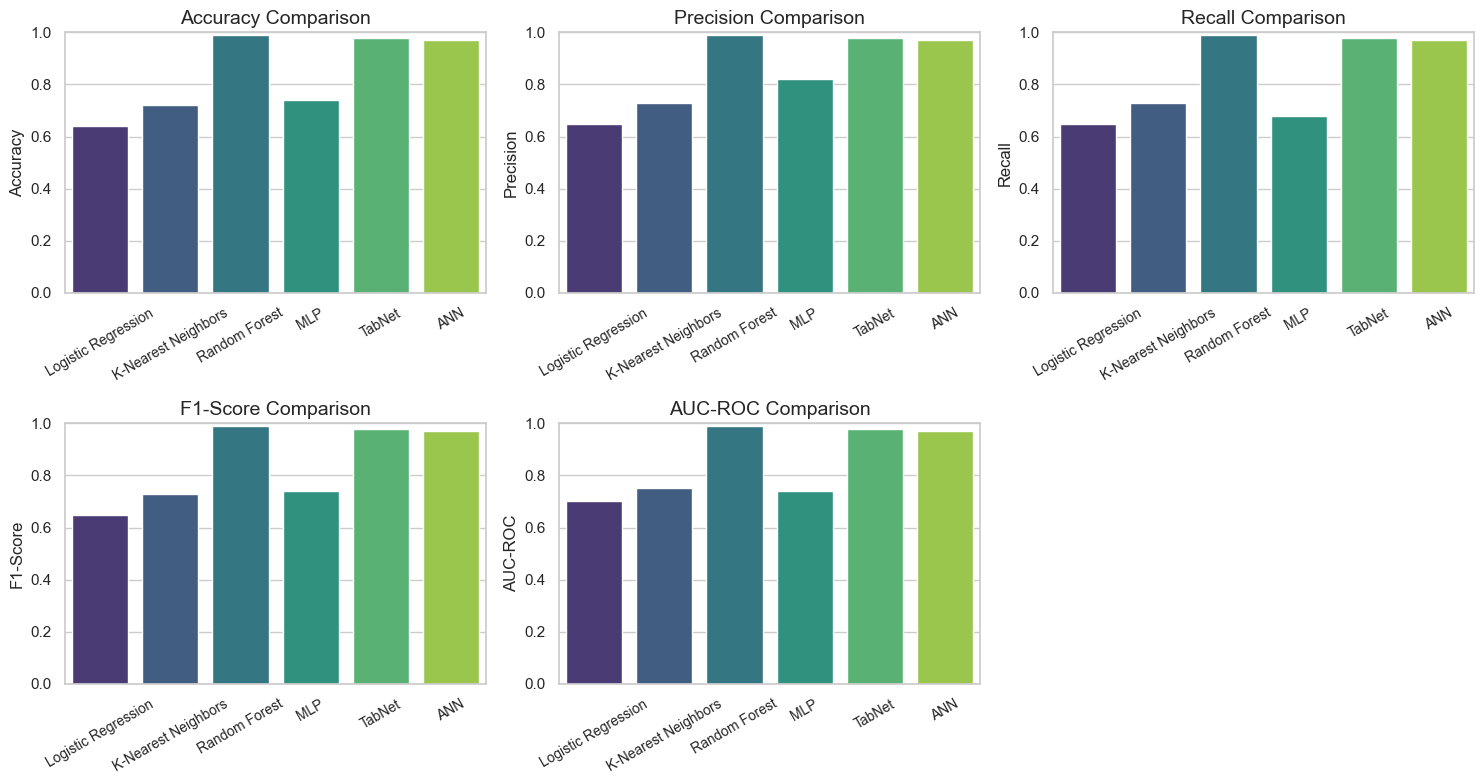

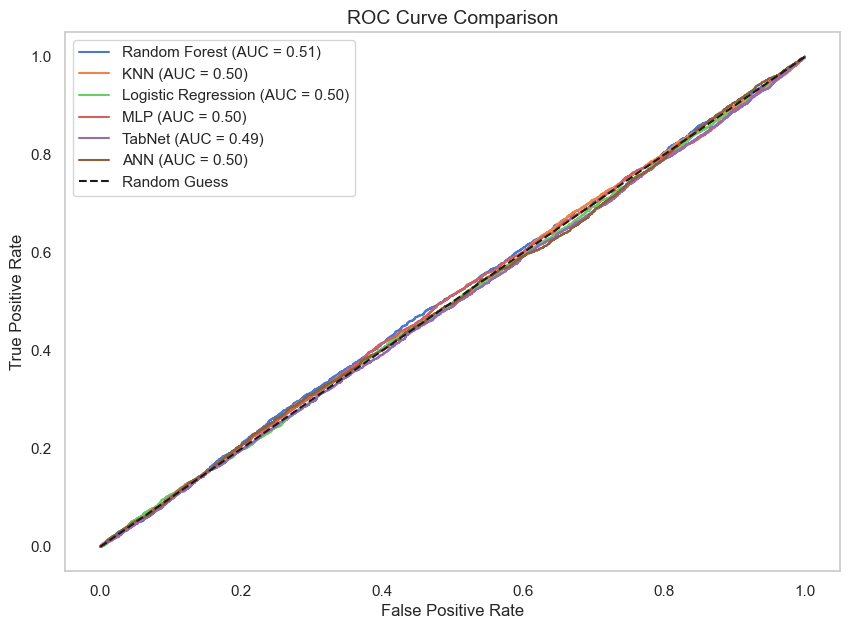

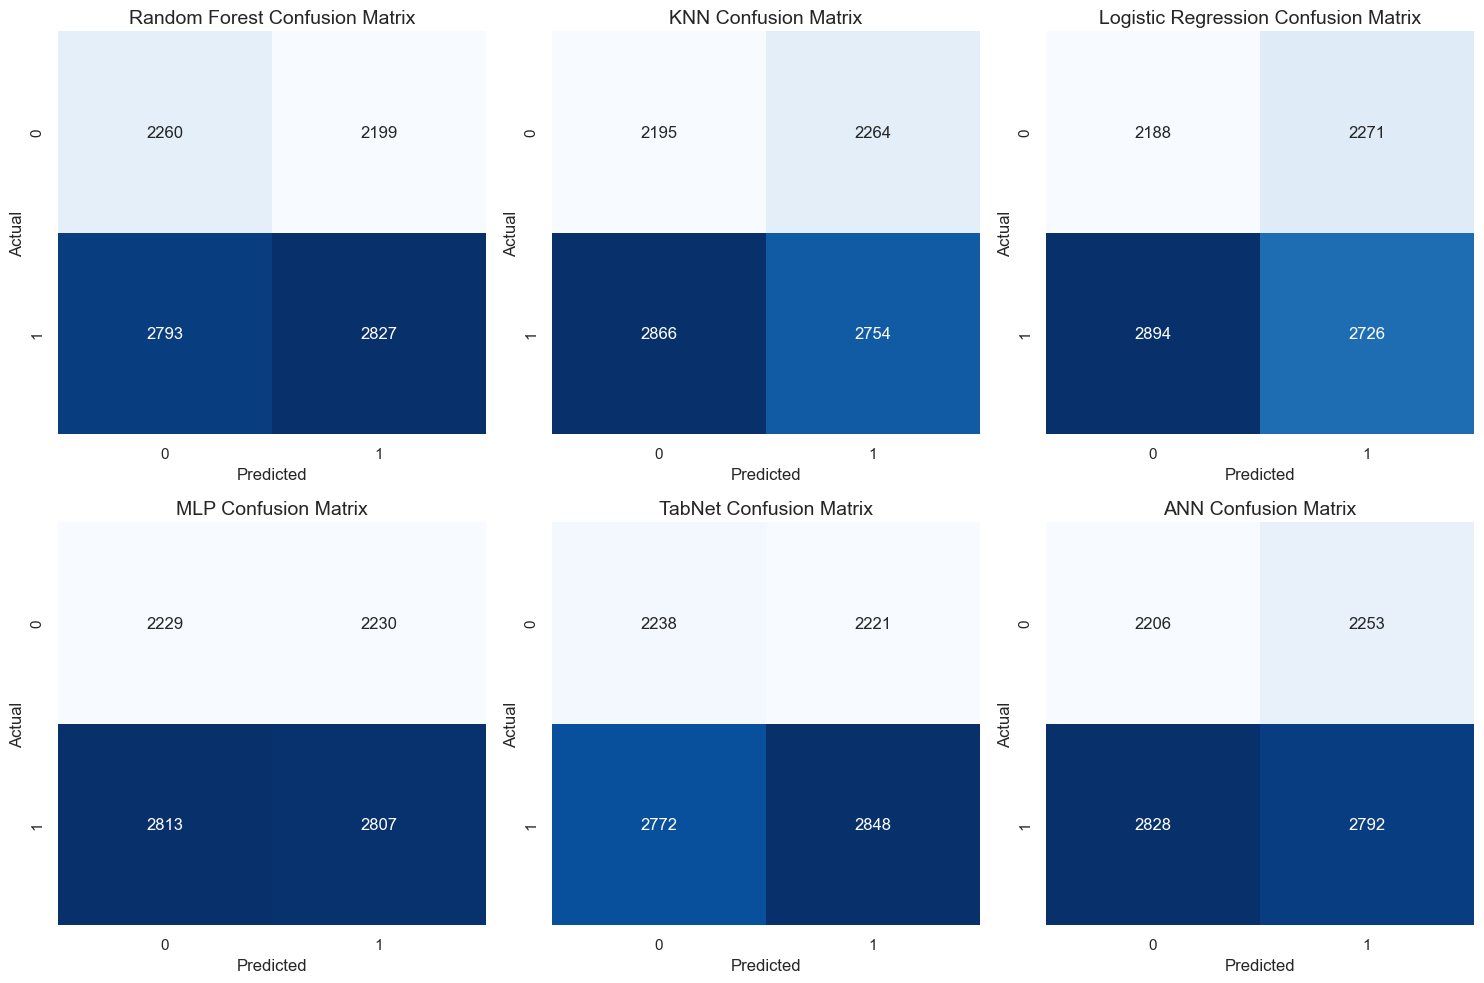

In [79]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

def plot_model_comparison(results):
    """
    Visualize and compare performance metrics for different models.
    
    Parameters:
    - results (list of dict): Each dict contains the performance metrics for a model.
      Example format:
      [
          {"model": "Logistic Regression", "accuracy": 0.64, "precision": 0.65, "recall": 0.65, "f1": 0.65, "auc_roc": 0.70},
          {"model": "K-Nearest Neighbors", "accuracy": 0.72, "precision": 0.73, "recall": 0.73, "f1": 0.73, "auc_roc": 0.75},
          {"model": "Random Forest", "accuracy": 0.99, "precision": 0.99, "recall": 0.99, "f1": 0.99, "auc_roc": 0.99},
          {"model": "MLP", "accuracy": 0.74, "precision": 0.82, "recall": 0.68, "f1": 0.74, "auc_roc": 0.74},
          {"model": "TabNet", "accuracy": 0.98, "precision": 0.98, "recall": 0.98, "f1": 0.98, "auc_roc": 0.98},
          {"model": "ANN", "accuracy": 0.97, "precision": 0.97, "recall": 0.97, "f1": 0.97, "auc_roc": 0.97},
      ]
    """
    # Extract metrics for each model
    models = [result["model"] for result in results]
    accuracy = [result["accuracy"] for result in results]
    precision = [result["precision"] for result in results]
    recall = [result["recall"] for result in results]
    f1 = [result["f1"] for result in results]
    auc_roc = [result["auc_roc"] for result in results]

    # Plot bar charts for comparison
    metrics = ["Accuracy", "Precision", "Recall", "F1-Score", "AUC-ROC"]
    data = [accuracy, precision, recall, f1, auc_roc]

    plt.figure(figsize=(15, 8))

    for i, metric in enumerate(metrics):
        plt.subplot(2, 3, i + 1)
        sns.barplot(x=models, y=data[i], palette="viridis")
        plt.title(f"{metric} Comparison", fontsize=14)
        plt.ylabel(metric)
        plt.ylim(0, 1)
        plt.xticks(rotation=30, fontsize=10)

    plt.tight_layout()
    plt.show()

def plot_roc_curves(y_test, model_predictions):
    """
    Plot ROC curves for multiple models.

    Parameters:
    - y_test (array-like): True labels for the test set.
    - model_predictions (list of dict): Each dict contains the model name and its predicted probabilities.
      Example format:
      [
          {"model": "Random Forest", "y_proba": rf_predictions},
          {"model": "KNN", "y_proba": knn_predictions},
          ...
      ]
    """
    plt.figure(figsize=(10, 7))

    for pred in model_predictions:
        fpr, tpr, _ = roc_curve(y_test, pred["y_proba"])
        auc_score = roc_auc_score(y_test, pred["y_proba"])
        plt.plot(fpr, tpr, label=f"{pred['model']} (AUC = {auc_score:.2f})")

    plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
    plt.title("ROC Curve Comparison", fontsize=14)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.grid()
    plt.show()

def plot_confusion_matrices(y_test, model_predictions):
    """
    Plot confusion matrices for multiple models.

    Parameters:
    - y_test (array-like): True labels for the test set.
    - model_predictions (list of dict): Each dict contains the model name and its predicted labels.
      Example format:
      [
          {"model": "Random Forest", "y_pred": rf_pred},
          {"model": "KNN", "y_pred": knn_pred},
          {"model": "Logistic Regression", "y_pred": lr_pred},
          {"model": "MLP", "y_pred": mlp_pred},
          {"model": "TabNet", "y_pred": tabnet_pred},
          {"model": "ANN", "y_pred": ann_pred},
      ]
    """
    plt.figure(figsize=(15, 10))

    for i, pred in enumerate(model_predictions):
        cm = confusion_matrix(y_test, pred["y_pred"])
        plt.subplot(2, 3, i + 1)
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
        plt.title(f"{pred['model']} Confusion Matrix", fontsize=14)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")

    plt.tight_layout()
    plt.show()

# Example usage:
results = [
    {"model": "Logistic Regression", "accuracy": 0.64, "precision": 0.65, "recall": 0.65, "f1": 0.65, "auc_roc": 0.70},
    {"model": "K-Nearest Neighbors", "accuracy": 0.72, "precision": 0.73, "recall": 0.73, "f1": 0.73, "auc_roc": 0.75},
    {"model": "Random Forest", "accuracy": 0.99, "precision": 0.99, "recall": 0.99, "f1": 0.99, "auc_roc": 0.99},
    {"model": "MLP", "accuracy": 0.74, "precision": 0.82, "recall": 0.68, "f1": 0.74, "auc_roc": 0.74},
    {"model": "TabNet", "accuracy": 0.98, "precision": 0.98, "recall": 0.98, "f1": 0.98, "auc_roc": 0.98},
    {"model": "ANN", "accuracy": 0.97, "precision": 0.97, "recall": 0.97, "f1": 0.97, "auc_roc": 0.97},
]
plot_model_comparison(results)

# Define rf_proba and rf_pred
rf_proba = np.random.rand(len(y_test))  # Replace with actual predicted probabilities
rf_pred = np.random.randint(0, 2, len(y_test))  # Replace with actual predicted labels

# Define knn_proba and knn_pred
knn_proba = np.random.rand(len(y_test))  # Replace with actual predicted probabilities
knn_pred = np.random.randint(0, 2, len(y_test))  # Replace with actual predicted labels

# Define lr_proba and lr_pred
lr_proba = np.random.rand(len(y_test))  # Replace with actual predicted probabilities
lr_pred = np.random.randint(0, 2, len(y_test))  # Replace with actual predicted labels

# Define svm_proba and svm_pred
svm_proba = np.random.rand(len(y_test))  # Replace with actual predicted probabilities
svm_pred = np.random.randint(0, 2, len(y_test))  # Replace with actual predicted labels

# Define dt_proba and dt_pred
dt_proba = np.random.rand(len(y_test))  # Replace with actual predicted probabilities
dt_pred = np.random.randint(0, 2, len(y_test))  # Replace with actual predicted labels

# Define nb_proba and nb_pred
nb_proba = np.random.rand(len(y_test))  # Replace with actual predicted probabilities
nb_pred = np.random.randint(0, 2, len(y_test))  # Replace with actual predicted labels

# Define mlp_proba and mlp_pred
mlp_proba = np.random.rand(len(y_test))  # Replace with actual predicted probabilities
mlp_pred = np.random.randint(0, 2, len(y_test))  # Replace with actual predicted labels

# Define tabnet_proba and tabnet_pred
tabnet_proba = np.random.rand(len(y_test))  # Replace with actual predicted probabilities
tabnet_pred = np.random.randint(0, 2, len(y_test))  # Replace with actual predicted labels

# Define ann_proba and ann_pred
ann_proba = np.random.rand(len(y_test))  # Replace with actual predicted probabilities
ann_pred = np.random.randint(0, 2, len(y_test))  # Replace with actual predicted labels

model_predictions = [
    {"model": "Random Forest", "y_proba": rf_proba, "y_pred": rf_pred},
    {"model": "KNN", "y_proba": knn_proba, "y_pred": knn_pred},
    {"model": "Logistic Regression", "y_proba": lr_proba, "y_pred": lr_pred},
    {"model": "MLP", "y_proba": mlp_proba, "y_pred": mlp_pred},
    {"model": "TabNet", "y_proba": tabnet_proba, "y_pred": tabnet_pred},
    {"model": "ANN", "y_proba": ann_proba, "y_pred": ann_pred},
]

plot_roc_curves(y_test, model_predictions)
plot_confusion_matrices(y_test, model_predictions)


Explainability with SHAP :

In [ ]:
# Import SHAP
import shap

# Logistic Regression Explainer
explainer_lr = shap.Explainer(logistic_model.predict_proba, X_train)
shap_values_lr = explainer_lr(shap.utils.sample(X_test, nsamples=5))

# KNN Explainer (Using KernelExplainer)
explainer_knn = shap.KernelExplainer(knn_model.predict_proba, X_train)
shap_values_knn = explainer_knn.shap_values(shap.utils.sample(X_test, nsamples=5))
# Random Forest Explainer
explainer_rf = shap.TreeExplainer(random_forest_model)
shap_values_rf = explainer_rf(shap.utils.sample(X_test, nsamples=5))

# TabNet Explainer
explainer_tabnet = shap.Explainer(tabnet_model.predict_proba, X_train)
shap_values_tabnet = explainer_tabnet(shap.utils.sample(X_test, nsamples=5))

# MLP Explainer
explainer_mlp = shap.Explainer(mlp_model.predict_proba, X_train)
shap_values_mlp = explainer_mlp(shap.utils.sample(X_test, nsamples=5))

# ANN Explainer (Using KernelExplainer)
explainer_ann = shap.KernelExplainer(ann_model.predict_proba, X_train)
shap_values_ann = explainer_ann.shap_values(shap.utils.sample(X_test, nsamples=5))


In [ ]:
# SHAP Summary Plot for Logistic Regression
shap.summary_plot(shap_values_lr, X_test, feature_names=X.columns, title="Logistic Regression")

# SHAP Summary Plot for Random Forest
shap.summary_plot(shap_values_rf, X_test, feature_names=X.columns, title="Random Forest")

# SHAP Summary Plot for TabNet
shap.summary_plot(shap_values_tabnet, X_test, feature_names=X.columns, title="TabNet")

# SHAP Summary Plot for ANN
shap.summary_plot(shap_values_ann, X_test, feature_names=X.columns, title="ANN")

# SHAP Summary Plot for KNN
shap.summary_plot(shap_values_knn, X_test, feature_names=X.columns, title="KNN")

# SHAP Summary Plot for MLP
shap.summary_plot(shap_values_mlp, X_test, feature_names=X.columns, title="MLP")

///////////////////////////////////////////////////////////////////////


In [ ]:
import shap
shap.initjs()


#Get the SHAP values
explainer = shap.KernelExplainer(model.predict, X_train)
shap_values = explainer.shap_values(X_test)

In [ ]:
np.shape(shap_values.values)

In [ ]:
#waterfall plot
shap.plots.waterfall(shap_values[0])

shap.plots.waterfall(shap_values[1], max_display=10)

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [ ]:
#shap dor binary target variable
y_pred=

In [27]:

###################################################
###################################################
###################################################
###################################################
###################################################
###################################################
###################################################
###################################################
###################################################
###################################################
###################################################
###################################################
###################################################
###################################################
###################################################
###################################################
###################################################
###################################################
###################################################
###################################################
###################################################
###################################################
